### Steps:
<ul>
    <li>Quality control
    <li>Trim flank sequences
    <li>Count unique insertion sequences
    <li>Collapse on 1/2-Hamming distances
    <li>Translate DNA --> amino acids
    <li>Compute:<ul>
                    <li>Frequency
                    <li>Average frequency
                    <li>Enrichment Score
                    <li>Heatmap
</ul>

2 tool suggestions:
- UMItools (CLI tool) - clustering algorithm
- cutadapt 

In the large fastq library file, I'm only pulling the sequences that I've already found in the tissue files


## Quality control (skipped for now)

## Trim Flank Sequences
Trimming of invariable sequence flanking the insertion sequence allowing a 10% error rate (currently allowing 0% error rate--we'll work on this later)

In [1]:
import gzip
from mimetypes import guess_type
from functools import partial
from Bio import SeqIO

In [75]:
input_file = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1153-cDNA-8V8_S30_L001_R1_001.fastq.gz'

encoding = guess_type(input_file)[1]  # uses file extension
_open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

read_count = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        read_count += 1

print(read_count)

173019


In [3]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record)
        print(record.seq)
        break

ID: M06176:70:000000000-JW4VC:1:1101:8803:1076
Name: M06176:70:000000000-JW4VC:1:1101:8803:1076
Description: M06176:70:000000000-JW4VC:1:1101:8803:1076 1:N:0:NCGGTCCAAC+NCTTACATCA
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCA...CGG')
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [4]:
Left_flank = 'taacttgcagcagcaaGGC' 
Right_flank = 'GCCaacacggctcctcaaa'

Left_flank = Left_flank.upper()
Right_flank = Right_flank.upper()
print(Left_flank, Right_flank)

TAACTTGCAGCAGCAAGGC GCCAACACGGCTCCTCAAA


In [5]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record.seq)
        if Left_flank in record.seq:
            index = record.seq.find(Left_flank)
            print('Left_flank in record.seq at index : ', str(index))
            left_flank_loc = record.seq[:index] + ' left flank start --> ' + record.seq[index:index + len(Left_flank)] + ' <-- left flank end ' + record.seq[index + len(Left_flank):]
            print(left_flank_loc)
        if Right_flank in record.seq:
            index = record.seq.find(Right_flank)
            print('Right_flank in record.seq at index : ', str(index))
            Right_flank_loc = record.seq[:index] + ' right flank start --> ' + record.seq[index:index + len(Right_flank)] + ' <-- right flank end ' + record.seq[index + len(Right_flank):]
            print(Right_flank_loc)
            break

TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end AAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCGTGCCAACACGGNTNCTNNAATTGGANNNNNCNACAGCCAGNGGGNCTTACCCGNNATGGTCTGGCAGAACCGGGACGTGTACCT
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCTCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end TCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCCAGGGTCNTGTTCNGCAGCAGGNCAACACGG

In [6]:
# goal: display left and right flank tags together 
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
#         print(record.seq)
        if Left_flank in record.seq and Right_flank in record.seq:
            l_start = record.seq.find(Left_flank)
            r_start = record.seq.find(Right_flank)
            print('Left_flank in record.seq at index : ', str(l_start))
            print('Right_flank in record.seq at index : ', str(r_start))
            annotated_seq = record.seq[:l_start] + ' left flank start --> ' + record.seq[l_start:l_start + len(Left_flank)] + ' <-- left flank end ' + record.seq[l_start + len(Left_flank):r_start]
            annotated_seq += ' right flank start --> ' + record.seq[r_start:r_start + len(Right_flank)] + ' <-- right flank end ' + record.seq[r_start + len(Right_flank):]
            print(annotated_seq)
            break


Left_flank in record.seq at index :  39
Right_flank in record.seq at index :  79
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end CTGTACCNGCATCATACTGAC right flank start --> GCCAACACGGCTCCTCAAA <-- right flank end TTGGAACTTNCAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [7]:
# goal: extract all insert sequences
insert_seqs = []
index = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)
            index += 1
print(index)
print(len(insert_seqs))


115746
115746


In [8]:
print(len(insert_seqs))

115746


In [9]:
seq_lengths = [len(seq) for seq in insert_seqs]
seq_lengths

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 30,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 24,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 30,
 21,
 24,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,


In [10]:
seq_length_dict = {}
for seq in insert_seqs:
    if len(seq) not in seq_length_dict:
        seq_length_dict[len(seq)] = 1
    else:
        seq_length_dict[len(seq)] += 1

seq_length_dict

{21: 104313, 24: 10511, 30: 769, 27: 17, 18: 102, 20: 23, 19: 2, 22: 5, 23: 4}

In [11]:
seq_length_length = []
seq_length_count = []
for item in seq_length_dict:
    seq_length_length.append(item)
    seq_length_count.append(seq_length_dict[item])
seq_length_length
seq_length_count

[104313, 10511, 769, 17, 102, 23, 2, 5, 4]

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
seq_length_df = pd.DataFrame.from_dict(list(zip(seq_length_length,seq_length_count)))
seq_length_df.columns=['length','count']
seq_length_df = seq_length_df.sort_values(by=['count'], ascending=False)
seq_length_df

,length,count
0,21,104313
1,24,10511
2,30,769
4,18,102
5,20,23
3,27,17
7,22,5
8,23,4
6,19,2


In [14]:
# sns.displot(seq_length_df)

<AxesSubplot:xlabel='length', ylabel='count'>

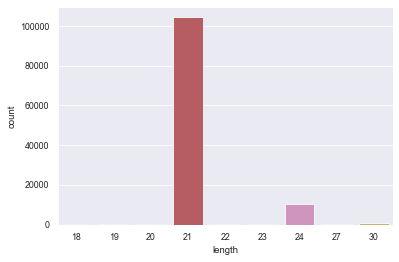

In [15]:
sns.set_theme('paper')
sns.barplot(data=seq_length_df, x='length', y='count')

In [16]:
print(len(insert_seqs))

115746


In [17]:
insert_seqs[0]

Seq('CTGTACCNGCATCATACTGAC')

In [18]:
import numpy as np

In [19]:
insert_seqs_array = np.asarray(insert_seqs, dtype=object)
unique_seqs = np.unique(insert_seqs_array)
len(unique_seqs)

2759

In [20]:
unique_seqs_dict = {}
for seq in unique_seqs:
    unique_seqs_dict[str(seq)] = insert_seqs.count(seq)
    
print(len(unique_seqs_dict))

{'AAAAAAAATCATGCGGGACGAA': 1, 'AAAAAAAGCATGCATGACGAA': 1, 'AAAAAAATCAAGCGTGACGAA': 1, 'AAAAAAATCATACGTGACGAA': 1, 'AAAAAAATCATCCGTGACGAA': 1, 'AAAAAAATCATGCGGGACGAA': 1, 'AAAAAAATCATGCGTGAAGAA': 1, 'AAAAAAATCATGCGTGACGAA': 522, 'AAAAAAATCATGCGTGACTAA': 1, 'AAAAAAATCATGCGTGATGAA': 1, 'AAAAAAATCATGTGTGACGAA': 1, 'AAAAAAATCATTCGGGACGAA': 1, 'AAAAAAATCCTGCGTGACGAA': 1, 'AAAAAAATTGTTCTTGACGTT': 1, 'AAAAAACTCATGCGTGACGAA': 1, 'AAAAAATCATGCGTGACGAA': 3, 'AAAAAATCTTCTGACAACTAC': 1, 'AAAAACAAAGGTTTCGTTGGTGAC': 1, 'AAAAACGTTGTGTCTGCGGGT': 1, 'AAAAAGATCATGCGTGACGAA': 1, 'AAAAATGTTGTTACTGGTGTT': 1, 'AAAACAATCATGCGTGACGAA': 1, 'AAAACAATCATGCGTGACGCA': 1, 'AAAACCCAGGTTTCTAAACCG': 1, 'AAAACGGTTGTTACTTGTGAT': 1, 'AAAACTGACGTCACTGATGTT': 1, 'AAAACTGATGTAACTGGTGTT': 1, 'AAAACTGATGTTACTGGTGTT': 1, 'AAAACTGCTATTGGTAACGAC': 1, 'AAAACTGCTGTTACTGGTGTT': 1, 'AAAACTGGTGTTACTGGTGTT': 1, 'AAAACTGTGGACACTGGGGTT': 1, 'AAAACTGTTGCTACTGGTGTT': 1, 'AAAACTGTTGTTACCGGTGTT': 1, 'AAAACTGTTGTTACTGGAGTT': 1, 'AAAACTGTTGTTA

In [21]:
unique_seqs_sorted = sorted(unique_seqs_dict.items(), key=lambda x: x[1], reverse=True)
unique_seqs_sorted

[('GACGTTAAACCGTACTCTATG', 7006),
 ('TACCATCATGACCATCCGATC', 6281),
 ('GACTCTGTTCGTGCTCAGAAA', 6016),
 ('ATCTTCCGTGACTCTCGTGTT', 5677),
 ('AAAGTTCGTGCTCCGAACATC', 5498),
 ('ACTAAATCTCAGATGACTGTT', 5005),
 ('CCGGGTAAAATGCAGGGTAAA', 4944),
 ('GGTGGTAACGACGCTTACATC', 4334),
 ('ATGCAGAAAGACCAGCTGAAAAAA', 3680),
 ('ATGGGTCGTCCGGCTCAGCAT', 3380),
 ('CTGTACCTGCATCATACTGAC', 2827),
 ('GTTGTTGCTGACGGTGGTCGT', 2813),
 ('CGTGGTCCGAAAGAAATCGCT', 2774),
 ('CAGGGTCATGTTCAGCAGCAG', 2755),
 ('GTTCGTGTTCAGGGTCAGCATATC', 2366),
 ('AAATTCGTTGTTAAAGCTCAG', 2339),
 ('CGTCGTGAACAGATGCTGGGT', 2117),
 ('TCTGAAATGCCGACTGGTTTC', 2011),
 ('AAAGCTCAGGTTTCTAAACCG', 1953),
 ('AAAATCAAAGGTTTCGTTGGTGAC', 1878),
 ('AAAGCTGCTATCGGTAACGAC', 1626),
 ('TCTGCTAAAAAAGTTGACACT', 1555),
 ('CCGCAGTACGCTCAGATCTCT', 1503),
 ('ATGTCTCAGAAAACTTACGTT', 1477),
 ('ATGGAAGCTGACGGTACTTTC', 1381),
 ('CATCATACTTCTACTACTCTG', 1362),
 ('GTTGACGGTAAACAGCGTTAC', 1315),
 ('ACTACTACTCCGGCTCGTGGT', 1305),
 ('TACCATTCTATGACTATGGAC', 1205),
 ('AA

In [22]:
!pip3 install umi_tools

## Practice UMIClusterer class "functor"

In [23]:
from umi_tools import UMIClusterer
clusterer = UMIClusterer(cluster_method="directional")

In [24]:
print()

In [25]:
for seq in unique_seqs_sorted[0:4]:
    print(seq[0])
    print(seq[1])

GACGTTAAACCGTACTCTATG
7006
TACCATCATGACCATCCGATC
6281
GACTCTGTTCGTGCTCAGAAA
6016
ATCTTCCGTGACTCTCGTGTT
5677


In [26]:
umis = {b"GACGTTAAACCGTACTCTATG": 7006,
        b"GACGTTAAACCGTACTCTATA": 3000,
        b"GACTCTGTTCGTGCTCAGAAA": 3000,
        b"ATCTTCCGTAAAACTCGTGGG": 3000,
        b"GGGGGGCGTAAAACTCGTGGG": 1000
}
print(umis, '\n')

clustered_umis = clusterer(umis, threshold=2)
print(clustered_umis)

{b'GACGTTAAACCGTACTCTATG': 7006, b'GACGTTAAACCGTACTCTATA': 3000, b'GACTCTGTTCGTGCTCAGAAA': 3000, b'ATCTTCCGTAAAACTCGTGGG': 3000, b'GGGGGGCGTAAAACTCGTGGG': 1000} 

[[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA'], [b'GACTCTGTTCGTGCTCAGAAA'], [b'ATCTTCCGTAAAACTCGTGGG'], [b'GGGGGGCGTAAAACTCGTGGG']]


In [27]:
clustered_umis = clusterer(umis, threshold=2)
print(clustered_umis)

[[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA'], [b'GACTCTGTTCGTGCTCAGAAA'], [b'ATCTTCCGTAAAACTCGTGGG'], [b'GGGGGGCGTAAAACTCGTGGG']]


In [28]:
umis2 = {b"ATAT": 10,
        b"GTAT": 5,
        b"CCAT": 3}

In [29]:
clustered_umis2 = clusterer(umis2, threshold=1)
print(clustered_umis2)

[[b'ATAT', b'GTAT'], [b'CCAT']]


In [30]:
umis3 = {b"ATAT": 10,
        b"GTAT": 5,
        b"CCAT": 3}

clustered_umis3 = clusterer(umis3, threshold=1)
print(clustered_umis3)

[[b'ATAT', b'GTAT'], [b'CCAT']]


In [31]:
len('GACGTTAAACCGTACTCTATG')

21

# Cluster 21 nucleotide sequences that differ by 1-Hamming distance

Note: The UMIClusterer class only clusters sequences of equal length and 21 nt is, by far, the most frequent seq length. Therefore, only 21 nt seqs are evaluated here. Other length seqs can easily be evaluated with the same logic.

In [32]:
unique_umis = {}
for seq in unique_seqs_sorted:
    if len(seq[0]) == 21:
        seq_bytes = str.encode(seq[0])
        unique_umis[seq_bytes] = seq[1]
len(unique_umis)

2485

In [33]:
clustered_unique_umis = clusterer(unique_umis, threshold=1)
print(len(clustered_unique_umis))

860


In [34]:
for cluster in clustered_unique_umis:
    print(len(cluster))
    print(cluster)

98
[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATT', b'GACGTTACACCGTACTCTATG', b'GACGTTAAACCGTACGCTATG', b'GACGATAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA', b'GACGTTAAACAGTACTCTATG', b'GACGTTAAACCATACTCTATG', b'GACGTTAAACCGTACTATATG', b'GACGTTAAACCGGACTCTATG', b'GACGTTAAACCGTACTCTGTG', b'GACGTTAAAACGTACTCTATG', b'GCCGTTAAACCGTACTCTATG', b'GATGTTAAACCGTACTCTATG', b'GACGTTAAACTGTACTCTATG', b'GACGTTAAACCGTACTCTATC', b'GACGTTAAACCGTACTCTACG', b'GACGTTAAACCGTGCTCTATG', b'GACGTGAAACCGTACTCTATG', b'GACGTTAAACCGCACTCTATG', b'GACGTTAAACCGAACTCTATG', b'GACGTTAAACCTTACTCTATG', b'GACGTTCAACCGTACTCTATG', b'GACTTTAAACCGTACTCTATG', b'GACGTTAAACCGTACACTATG', b'GACGTTAAACCGTACTCTAGG', b'GACGTTAAACCGTACTCGATT', b'GACGTTAAACCGTACTCAATG', b'GACGTTAAACCGTACCCTATG', b'GACGTTAAACCGTCCTCTATG', b'GACGTTAAACCGTACTCTTTG', b'GACGTTAAACCGAACGCTATG', b'GACGTTAGACCGTACTCTATG', b'GACGATAAACCGCACTCTATG', b'GTCGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACGCTATT', b'GACGGTAAACCGTACTCTATG', b'AACGTTAAACCGTACTCTATG', b'GACGTT

1
[b'GACATTGCTAGTGGTGAGAAA']
1
[b'GACCATCCTCGCCTTGAGGTC']
1
[b'GACCCTGATCCTGCTCAGTTC']
1
[b'GACCTGTAAGCGCACACCTCT']
1
[b'GACGAACAACCGTATTCTCGG']
1
[b'GACGATAAACCGAAAGATGGT']
1
[b'GACGATACACCGTACACTATG']
1
[b'GACGATCTTGTTAACAAAGGT']
1
[b'GACGATGGACCTCACTCGATG']
1
[b'GACGCGTAACCTTCTGCTATG']
1
[b'GACGCTAAACAGTACCCGATG']
1
[b'GACGCTAAACGTTACTCTATG']
1
[b'GACGCTAAACTGTATTCTATG']
1
[b'GACGCTAACCGGTACTCTATG']
1
[b'GACGCTAATCCGAACCCTATG']
1
[b'GACGCTACACCGTAGGCTAAG']
1
[b'GACGCTATATCGTACTCTTTT']
1
[b'GACGCTGGTGTTCTGCAGAGT']
1
[b'GACGCTGTTCGTGCTCCGTAC']
1
[b'GACGGTAAACCGCACGCTATG']
1
[b'GACGGTAAACCGTACAATATG']
1
[b'GACGGTAATCAGGATTTTATG']
1
[b'GACGGTCAGCCGGGCTCTTTT']
1
[b'GACGTCAAACCGCACTCTATT']
1
[b'GACGTCACACCGAACTCTATG']
1
[b'GACGTGAAAACGCACTCTAAG']
1
[b'GACGTGAAACCGTAGTATTTG']
1
[b'GACGTTAAAACGTACGACATC']
1
[b'GACGTTAAAACGTAGTCTGTG']
1
[b'GACGTTAAACAGTCTTCTATG']
1
[b'GACGTTAAACCGTCGTCTATA']
1
[b'GACGTTAAACCTAACTCGATG']
1
[b'GACGTTAAACTGTACTCTTAC']
1
[b'GACGTTAAACTGTCCTTTATG']
1
[b'GACGTTAAG

In [35]:
# new counts based on 1-Hamming distance clustering

clustered_seq_counts = {}
for cluster in clustered_unique_umis:
    clustered_seq_counts[cluster[0].decode()] = 0
    for seq in cluster:
        clustered_seq_counts[cluster[0].decode()] += unique_seqs_dict[seq.decode()]
        
clustered_seq_counts

{'GACGTTAAACCGTACTCTATG': 7219,
 'TACCATCATGACCATCCGATC': 6399,
 'GACTCTGTTCGTGCTCAGAAA': 6195,
 'ATCTTCCGTGACTCTCGTGTT': 5846,
 'AAAGTTCGTGCTCCGAACATC': 5635,
 'ACTAAATCTCAGATGACTGTT': 5143,
 'CCGGGTAAAATGCAGGGTAAA': 5106,
 'GGTGGTAACGACGCTTACATC': 4440,
 'ATGGGTCGTCCGGCTCAGCAT': 3473,
 'CTGTACCTGCATCATACTGAC': 2916,
 'GTTGTTGCTGACGGTGGTCGT': 2875,
 'CGTGGTCCGAAAGAAATCGCT': 2858,
 'CAGGGTCATGTTCAGCAGCAG': 2839,
 'AAATTCGTTGTTAAAGCTCAG': 2407,
 'CGTCGTGAACAGATGCTGGGT': 2186,
 'TCTGAAATGCCGACTGGTTTC': 2058,
 'AAAGCTCAGGTTTCTAAACCG': 2021,
 'AAAGCTGCTATCGGTAACGAC': 1663,
 'TCTGCTAAAAAAGTTGACACT': 1589,
 'CCGCAGTACGCTCAGATCTCT': 1546,
 'ATGTCTCAGAAAACTTACGTT': 1523,
 'ATGGAAGCTGACGGTACTTTC': 1414,
 'CATCATACTTCTACTACTCTG': 1434,
 'GTTGACGGTAAACAGCGTTAC': 1348,
 'ACTACTACTCCGGCTCGTGGT': 1342,
 'TACCATTCTATGACTATGGAC': 1450,
 'AACAAAGTTAACGTTGTTAAA': 1086,
 'GAAGAAGTTATGAAACGTTAC': 1015,
 'CAGTCTCAGATGCGTAACACT': 949,
 'TCTCGTCATATGCCGGCTACT': 783,
 'TCTCAGGACCGTCCGCAGAAA': 772,
 'AAAACTGTT

# Cluster 21 nucleotide sequences that differ by 2-Hamming distance

In [36]:
clustered_unique_umis2 = clusterer(unique_umis, threshold=2)
print(len(clustered_unique_umis2))

545


In [37]:
# new counts based on 1-Hamming distance clustering

clustered_seq_counts2 = {}
for cluster in clustered_unique_umis2:
    clustered_seq_counts2[cluster[0].decode()] = 0
    for seq in cluster:
        clustered_seq_counts2[cluster[0].decode()] += unique_seqs_dict[seq.decode()]
        
clustered_seq_counts2

{'GACGTTAAACCGTACTCTATG': 7245,
 'TACCATCATGACCATCCGATC': 6413,
 'GACTCTGTTCGTGCTCAGAAA': 6207,
 'ATCTTCCGTGACTCTCGTGTT': 5862,
 'AAAGTTCGTGCTCCGAACATC': 5648,
 'ACTAAATCTCAGATGACTGTT': 5151,
 'CCGGGTAAAATGCAGGGTAAA': 5121,
 'GGTGGTAACGACGCTTACATC': 4453,
 'ATGGGTCGTCCGGCTCAGCAT': 3486,
 'CTGTACCTGCATCATACTGAC': 2926,
 'GTTGTTGCTGACGGTGGTCGT': 2880,
 'CGTGGTCCGAAAGAAATCGCT': 2869,
 'CAGGGTCATGTTCAGCAGCAG': 2843,
 'AAATTCGTTGTTAAAGCTCAG': 2410,
 'CGTCGTGAACAGATGCTGGGT': 2192,
 'TCTGAAATGCCGACTGGTTTC': 2065,
 'AAAGCTCAGGTTTCTAAACCG': 2026,
 'AAAGCTGCTATCGGTAACGAC': 1668,
 'TCTGCTAAAAAAGTTGACACT': 1596,
 'CCGCAGTACGCTCAGATCTCT': 1552,
 'ATGTCTCAGAAAACTTACGTT': 1527,
 'ATGGAAGCTGACGGTACTTTC': 1420,
 'CATCATACTTCTACTACTCTG': 1436,
 'GTTGACGGTAAACAGCGTTAC': 1349,
 'ACTACTACTCCGGCTCGTGGT': 1345,
 'TACCATTCTATGACTATGGAC': 1463,
 'AACAAAGTTAACGTTGTTAAA': 1089,
 'GAAGAAGTTATGAAACGTTAC': 1019,
 'CAGTCTCAGATGCGTAACACT': 952,
 'TCTCGTCATATGCCGGCTACT': 787,
 'TCTCAGGACCGTCCGCAGAAA': 775,
 'AAAACTGTT

In [38]:
for seq in clustered_unique_umis[55]:
    print(seq.decode("utf-8"))

GTTCCGGACCAGCGTCCGAAA
GTTCCGGACCAGCGTCCGAAT
ATTCCGGACCAGCGTCCGAAA
GTTCCGAACCAGCGTCCGAAA
GTTCCGGACCAGTGTCCGAAA


# Visualize a UMI cluster graph

### Exanple: Below is the 55th cluster from the 21 nucleotide insert sequences
### The central node had the highest frequency prior to clustering -- each child node is a sequence with a hamming distance of 1 from the central node.
![](cluster55.png)

# Translate DNA to amino acid sequences for 2000 most abundant peptides

In [39]:
to_translate = unique_seqs_sorted[:2000]

In [40]:
from Bio.Seq import Seq

In [41]:
peptides = []
for seq in to_translate:
    dna = Seq(seq[0])
    rna = dna.transcribe()
    peptide = rna.translate()
    peptides.append(str(peptide))
#     print(dna)
#     print(rna)
#     print(peptide)
    

/Users/jonathanlifferth/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [42]:
peptides

['DVKPYSM',
 'YHHDHPI',
 'DSVRAQK',
 'IFRDSRV',
 'KVRAPNI',
 'TKSQMTV',
 'PGKMQGK',
 'GGNDAYI',
 'MQKDQLKK',
 'MGRPAQH',
 'LYLHHTD',
 'VVADGGR',
 'RGPKEIA',
 'QGHVQQQ',
 'VRVQGQHI',
 'KFVVKAQ',
 'RREQMLG',
 'SEMPTGF',
 'KAQVSKP',
 'KIKGFVGD',
 'KAAIGND',
 'SAKKVDT',
 'PQYAQIS',
 'MSQKTYV',
 'MEADGTF',
 'HHTSTTL',
 'VDGKQRY',
 'TTTPARG',
 'YHSMTMD',
 'NKVNVVK',
 'EEVMKRY',
 'QSQMRNT',
 'SRHMPAT',
 'SQDRPQK',
 'KTVVTGV',
 'ASGAGKQS',
 'SFQFKER',
 'KQPHSQS',
 'IKPLEIK',
 'VVSRGAV',
 'VEPQGPR',
 'VIKPTGK',
 'KDYPRGD',
 'FYFYFQA',
 'YVGVLRG',
 'KKIMRDE',
 'SKASQQT',
 'RLMPNPK',
 'KSAGVTL',
 'HNKVQAM',
 'IGMSQPA',
 'SKGVIHQDKD',
 'KVSPERKL',
 'PDSGVRV',
 'HHEHHVL',
 'SFRHDSG',
 'AVKGLTQGMT',
 'QQKQIDK',
 'KVVPNGQK',
 'AYREGRH',
 'VDTKNKL',
 'VSGIKFN',
 'PNFIQVR',
 'VPDQRPK',
 'YHSMTMG',
 'GMMSFEH',
 'ANIKNPIR',
 'QIDKSRS',
 'EIRATTKI',
 'MGTVKQE',
 'MTQRGQA',
 'LRQLVMH',
 'ENMVQRH',
 'RVGSIKQ',
 'MYQREKS',
 'RVGSSDV',
 'YNSPVVP',
 'YALGSDDS',
 'QVGHQNI',
 'HDHVSRG',
 'GKKEIAS',
 'SSTIAQ',
 '

## Compute:
<ul>
<li>i. Frequency in samples
<li>ii. Average frequency across samples
<li>iii. Enrichment score, dividing frequency in tissue sample by frequency
in input library
<li>iv. Report your results on a heatmap (bonus)
<ul>

## Frequency in samples
### (Liver cDNA only)

In [43]:
import os
import time
from datetime import datetime

now = datetime.now()

In [44]:
target_dir = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA'

paths = []
for root, dirs, files in os.walk(target_dir):
    for file in files:
        if file.endswith('fastq.gz'):
            paths.append(os.path.join(root,file))            
paths.sort()
paths

for path in paths:
    key = path.split('/')[-1][:4]
    print(key)

1017
1027
1032
1153
1163
1168


In [45]:
%%script echo skipping

for input_file in paths:
    encoding = guess_type(input_file)[1]  # uses file extension
    _open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

    read_count = 0
    with _open(input_file) as f:
        for record in SeqIO.parse(f, 'fastq'):
            read_count += 1
    print(now)
    print(read_count)

skipping


In [46]:
start = datetime.now()
for i in range(10000):
    a = 2 + 2
end = datetime.now()
print(end - start)

0:00:00.000668


In [47]:
# extract all insert sequences
# start = datetime.now()



In [48]:
all_seqs = {}
seq_dict_of_dicts = {}

def get_seqs(path):
    
    start = datetime.now()
    insert_seqs = []
    index = 0
    unique_seqs_dict = {}

    with _open(path) as f:
        for record in SeqIO.parse(f, 'fastq'):
            index += 1
            if Left_flank in record.seq and Right_flank in record.seq:
                seq_start = record.seq.find(Left_flank) + len(Left_flank)
                seq_end = record.seq.find(Right_flank)
    #             print('start: ', seq_start, ', end: ', seq_end)
                seq = record.seq[seq_start:seq_end]
                insert_seqs.append(seq)

        # record unique sequence counts
        insert_seqs_array = np.asarray(insert_seqs, dtype=object)
        unique_seqs = np.unique(insert_seqs_array)

        
        for seq in unique_seqs:
            unique_seqs_dict[str(seq)] = insert_seqs.count(seq)
            if seq not in all_seqs:
                all_seqs[str(seq)] = insert_seqs.count(seq)
            else:
                all_seqs[str(seq)] += insert_seqs.count(seq)

        key = path.split('/')[-1][:4]
        seq_dict_of_dicts[str(key)] = unique_seqs_dict



        print('All seqs: ', index)
        print('Insert seqs:', len(insert_seqs))
        print('Unique seqs: ', len(unique_seqs_dict))
        print(datetime.now() - start)


In [49]:
paths[0]

'/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1017-cDNA-8V8_S29_L001_R1_001.fastq.gz'

In [50]:
insert_seqs = []
index = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)
            index += 1
print(index)
print(len(insert_seqs))

115746
115746


In [52]:
insert_seqs = []
index = 0
unique_seqs_dict = {}

with _open(paths[1]) as f:
    for record in SeqIO.parse(f, 'fastq'):
        index += 1     
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)

    print(index)
    print(insert_seqs[0])
# print(insert_seqs)
    # record unique sequence counts
    insert_seqs_array = np.asarray(insert_seqs, dtype=object)
    print('insert_seqs_array created')
    unique_seqs = np.unique(insert_seqs_array)
    print('unique_seqs created')
    print(unique_seqs[0])


    for seq in unique_seqs:
        print(seq)
        unique_seqs_dict[str(seq)] = insert_seqs.count(seq)
        print(insert_seqs.count(seq))
        if seq not in all_seqs:
            all_seqs[str(seq)] = insert_seqs.count(seq)
            print('seq not in all_seqs')
        elif seq in all_seqs:
            all_seqs[str(seq)] += insert_seqs.count(seq)
            print('seq in all_seqs')
    
    print('unique_seqs_dict created')

    key = paths[0].split('/')[-1][:4]
    seq_dict_of_dicts[str(key)] = unique_seqs_dict



    print('All seqs: ', index)
    print('Insert seqs:', len(insert_seqs))
    print('Unique seqs: ', len(unique_seqs_dict))
    print(datetime.now() - start)

428145
GCTGACTNTTTCGGTATCCTG
insert_seqs_array created
unique_seqs created
AAAAAAAAAGGTCAGGGTTCT
AAAAAAAAAGGTCAGGGTTCT
1
seq in all_seqs
AAAAAACCGGTTCAGGACGGT
2
seq in all_seqs
AAAAAAGAAGGTCAGAGTTCT
1
seq in all_seqs
AAAAAAGAAGGTCAGGGGTCT
1
seq in all_seqs
AAAAAAGAAGGTCAGGGTTCT
131
seq in all_seqs
AAAAAATAATGTCAGGGTTCT
1
seq in all_seqs
AAAAAATCTTACACTCCGGAA
1
seq in all_seqs
AAAAACAAAGTTCCGGTTTCT
1
seq in all_seqs
AAAAACAAGGACCTGATGGCT
1
seq in all_seqs
AAAAACACTGTTGACGACAAA
1
seq in all_seqs
AAAAACANGCCGGTTCCGAAA
1
seq in all_seqs
AAAAACATGCCGGGTCCGAAA
1
seq in all_seqs
AAAAACATGCCGGTTCCGAAA
55
seq in all_seqs
AAAAACATGGCTGACCGTACT
253
seq in all_seqs
AAAAACATGGCTTACCGTACT
1
seq in all_seqs
AAAAACATTGATGATCTTGCT
1
seq in all_seqs
AAAAACATTGCTGACCATAAT
1
seq in all_seqs
AAAAACATTGCTGACCTTACT
1
seq in all_seqs
AAAAACCAGGACATGATGGCT
1
seq in all_seqs
AAAAACCAGGACCCGATGGCT
1
seq in all_seqs
AAAAACCAGGACCTAATGGCT
1
seq in all_seqs
AAAAACCAGGACCTGATGGCA
1
seq in all_seqs
AAAAACCAGGACCTGATG

1
seq in all_seqs
AAACATCAGCCGACCGGTTCT
1
seq in all_seqs
AAACATCAGCCGACTGGTTCT
1
seq in all_seqs
AAACATCAGCTGACAGGTTCT
1
seq in all_seqs
AAACATCAGCTGACGGGTTCT
1
seq in all_seqs
AAACATCAGCTGACTGGATCT
1
seq in all_seqs
AAACATCAGCTGACTGGTTAT
1
seq in all_seqs
AAACATCAGCTGACTGGTTCC
2
seq in all_seqs
AAACATCAGCTGACTGGTTCT
698
seq in all_seqs
AAACATCAGCTGACTGTTTGT
1
seq in all_seqs
AAACATCAGGTGACTGGTTCT
1
seq in all_seqs
AAACATCATCAGGACTCTATC
3
seq in all_seqs
AAACATCATCTGACTGGTTCT
1
seq in all_seqs
AAACATCCGCAGTACTTCACT
2
seq in all_seqs
AAACATCGGCTGACTGGTTCT
1
seq in all_seqs
AAACATCGTCTGACTGGTACG
1
seq in all_seqs
AAACATCGTGACCTGTACCAG
1
seq in all_seqs
AAACATCGTGTTGTTGAAGTT
11
seq in all_seqs
AAACATCTGCTGACTGGTTCT
1
seq in all_seqs
AAACATGAACCGACTAAAGCT
1
seq in all_seqs
AAACATGAAGTTGTTGGTTAC
2
seq in all_seqs
AAACATTACGTTAACGGTCAG
12
seq in all_seqs
AAACATTTGCTGAATGGTTAT
1
seq in all_seqs
AAACCACCGGAATCTACTATC
1
seq in all_seqs
AAACCCGATGTGGACGCTAAA
1
seq in all_seqs
AAACCGAAAATGCAGATC

167
seq in all_seqs
AAAGGTCCGCCGAACGGTAAC
1
seq in all_seqs
AAAGGTCCGCCGAATGGTAAA
1
seq in all_seqs
AAAGGTCCGCCGCACGGTAAA
1
seq in all_seqs
AAAGGTCCGGGTAACCTGAAA
241
seq in all_seqs
AAAGGTCCGGGTAACCTGAAC
1
seq in all_seqs
AAAGGTCCGGGTAACCTGAAT
1
seq in all_seqs
AAAGGTCCGGGTAACCTGCAA
1
seq in all_seqs
AAAGGTCCGGGTAAGCTGAAA
1
seq in all_seqs
AAAGGTCCGGGTAATATCAAA
1
seq in all_seqs
AAAGGTCCGGTTGGTGTTGCTGAC
20
seq in all_seqs
AAAGGTCCTTCTGACCCTTCT
1
seq in all_seqs
AAAGGTCGGTCTGACTCTTCT
1
seq in all_seqs
AAAGGTCGTGATCACTTTTCT
1
seq in all_seqs
AAAGGTCGTGTTGAACATAAC
19
seq in all_seqs
AAAGGTCGTTCTGACACTTCT
1
seq in all_seqs
AAAGGTCGTTCTGACCCTTCT
3
seq in all_seqs
AAAGGTCGTTCTGACTCTCCT
1
seq in all_seqs
AAAGGTCGTTCTGACTCTTAT
1
seq in all_seqs
AAAGGTCGTTCTGACTCTTCA
1
seq in all_seqs
AAAGGTCGTTCTGACTCTTCT
729
seq in all_seqs
AAAGGTCGTTCTGACTTTTCT
1
seq in all_seqs
AAAGGTCGTTCTGCCTCTTCT
1
seq in all_seqs
AAAGGTCGTTTTGACTCTTCT
1
seq in all_seqs
AAAGGTCTGACTCAGCCGATC
1
seq in all_seqs
AAAGGTCTGTA

1
seq in all_seqs
AACAAAGATACTACAGCTTAA
1
seq in all_seqs
AACAAAGATACTGAGCTTTAC
1
seq in all_seqs
AACAAAGCTGCTCCGATGCAT
6
seq in all_seqs
AACAAAGTTACAGAACGTTAC
1
seq in all_seqs
AACAAAGTTACTGAACATTAC
1
seq in all_seqs
AACAAAGTTACTGAACGTTAC
447
seq in all_seqs
AACAAAGTTACTGAACGTTCC
1
seq in all_seqs
AACAAAGTTACTGAACGTTGC
1
seq in all_seqs
AACAAAGTTACTGACTACCGT
6
seq in all_seqs
AACAAATACCGTACTGTCGCT
1
seq in all_seqs
AACAAATTTACTGAACGTTAC
1
seq in all_seqs
AACAACACTCACAAGAAATGT
1
seq in all_seqs
AACAACACTCGTCTGACTCAGGTT
5
seq in all_seqs
AACAACAGTCGTGCTACGGAA
1
seq in all_seqs
AACAACATCAAAGATCCGTTC
1
seq in all_seqs
AACAACATCAAAGGTCCGATC
1
seq in all_seqs
AACAACATCAAAGGTCCGTTC
99
seq in all_seqs
AACAACATCAAAGTTCCGTTC
1
seq in all_seqs
AACAACCAGGAAGACATGGGT
1
seq in all_seqs
AACAACCATGGTGCTAACGGT
1
seq in all_seqs
AACAACCCTGCTGCTAACGGT
1
seq in all_seqs
AACAACCGAGGTGCTAACGGT
1
seq in all_seqs
AACAACCGCGGTGCTAACGGT
2
seq in all_seqs
AACAACCGGGGGACTAACGCT
1
seq in all_seqs
AACAACCGTGGAGATA

7
seq in all_seqs
AACCATGTTGTTGAAGGTATCGCT
51
seq in all_seqs
AACCATGTTGTTGACGGTATCGCT
1
seq in all_seqs
AACCATGTTGTTGTAGGTATCGCT
1
seq in all_seqs
AACCATGTTTCTATCACTGTC
1
seq in all_seqs
AACCATGTTTCTATCACTGTT
141
seq in all_seqs
AACCATGTTTCTATCCCTGTT
1
seq in all_seqs
AACCATGTTTCTATCGCTGTT
1
seq in all_seqs
AACCATTATGCTGCACATCAG
1
seq in all_seqs
AACCATTCCCGGGATGTTACT
1
seq in all_seqs
AACCATTCCGCTTCTTCTCAG
1
seq in all_seqs
AACCATTCGGCTTCTGCTCAG
1
seq in all_seqs
AACCATTCTGCTTATTCTCAG
1
seq in all_seqs
AACCATTCTGCTTCATCTCAG
1
seq in all_seqs
AACCATTCTGCTTCTTCTCAC
1
seq in all_seqs
AACCATTCTGCTTCTTCTCAG
318
seq in all_seqs
AACCATTCTGCTTCTTCTCAT
1
seq in all_seqs
AACCATTCTGCTTCTTCTCGG
1
seq in all_seqs
AACCATTCTGTTGGTGGTGTT
1
seq in all_seqs
AACCATTTCCAGGACATCGCT
1
seq in all_seqs
AACCCCAAGGGTAAAGTTCCG
1
seq in all_seqs
AACCCCTCTACTACTCAGAAA
1
seq in all_seqs
AACCCGAAGGGTAAAGTTCCG
1
seq in all_seqs
AACCCGATCGGTGACATCGTC
1
seq in all_seqs
AACCCGATCGGTGACATCGTT
373
seq in all_seqs
AACCCG

1
seq in all_seqs
AACGGTCTGTACGTTGACGCT
4
seq in all_seqs
AACGGTGATACTCAGCAGACT
1
seq in all_seqs
AACGGTGGTACTCATAAGGCT
1
seq in all_seqs
AACGGTGGTACTCATCAGGCT
73
seq in all_seqs
AACGGTGGTGGACCGACTATG
1
seq not in all_seqs
AACGGTGGTGGTCCGACTATG
4
seq not in all_seqs
AACGGTGTTCATGACGCTCAG
1
seq not in all_seqs
AACGGTTACGAAACTAAATTC
1
seq not in all_seqs
AACGGTTCCAACGTTGGTTTC
1
seq not in all_seqs
AACGGTTCTAACGCTGGTTTC
1
seq not in all_seqs
AACGGTTCTAACGTGGGTTTC
1
seq not in all_seqs
AACGGTTCTAACGTTGGCTTT
1
seq not in all_seqs
AACGGTTCTAACGTTGGGTTC
1
seq not in all_seqs
AACGGTTCTAACGTTGGTATC
1
seq not in all_seqs
AACGGTTCTAACGTTGGTTTC
536
seq not in all_seqs
AACGGTTCTAACGTTGTTTTC
1
seq not in all_seqs
AACGTACGTGTCTCTAAGATC
1
seq not in all_seqs
AACGTACGTTCTGAAGACCTG
1
seq not in all_seqs
AACGTCACCCATAACAACTCT
1
seq not in all_seqs
AACGTCTCTCATATGCAGTCT
1
seq not in all_seqs
AACGTTAACGCTGGTAACTCT
1
seq not in all_seqs
AACGTTACTGCTCTGGGTCAG
34
seq not in all_seqs
AACGTTACTGCTCTGGGTCAT
1
se

1
seq not in all_seqs
AAGCACTATGCATATCCTGAG
1
seq not in all_seqs
AAGCAGTCTAAATACGTTGCT
1
seq not in all_seqs
AAGCATAAACAGATGGACTGG
1
seq not in all_seqs
AAGCATAATAACAGTGATTGT
1
seq not in all_seqs
AAGCATACTAACATCGCTGTT
1
seq not in all_seqs
AAGCATCAGATGAAAATCGTT
1
seq not in all_seqs
AAGCATGCTGTTTCTCCGCGT
1
seq not in all_seqs
AAGCCGATCTGTGAAATCGTT
1
seq not in all_seqs
AAGCCGGCTAAAATCCCGGAC
1
seq not in all_seqs
AAGCCGGTTAAAATCACGGAC
1
seq not in all_seqs
AAGCCTAAACAGATGGACTGT
1
seq not in all_seqs
AAGCGTGAGTTGCGTCAGCTG
1
seq not in all_seqs
AAGCTGCCGATCCTGGACTTC
1
seq not in all_seqs
AAGCTGGAGAAACTCAAACCA
1
seq not in all_seqs
AAGCTTGTCACACTGCCTCAG
1
seq not in all_seqs
AAGGACCAGCGTAACCATGAC
1
seq not in all_seqs
AAGGACGACTTCCGTATGCTG
1
seq not in all_seqs
AAGGACGGTCGCAACGGTTTC
1
seq not in all_seqs
AAGGACGTTCGTACACTGACT
1
seq not in all_seqs
AAGGACGTTCGTCAGGTTCAT
1
seq not in all_seqs
AAGGCGGTGAAAGAAGTCTGG
1
seq not in all_seqs
AAGGCTAACAGCCATGAACAGACG
1
seq not in all_seqs
AAGGCTC

1
seq not in all_seqs
ACCGTTCAGCGAGGTGTAATC
1
seq not in all_seqs
ACCGTTGACTCTAAAAGCTAC
1
seq not in all_seqs
ACCGTTGACTCTATCCGTTAC
1
seq not in all_seqs
ACCGTTTCTAAAACTTCTATC
1
seq not in all_seqs
ACCTCTACTGACGTTGATTCT
1
seq not in all_seqs
ACCTCTACTTCTATCCAGACT
1
seq not in all_seqs
ACCTCTCCGCAGGAACTTCAG
1
seq not in all_seqs
ACCTTCGTTCACCAGGTTTACGTA
1
seq not in all_seqs
ACCTTCTCTCATATGCAGTCT
1
seq not in all_seqs
ACGAAAAATGAACTTCGTGAT
1
seq not in all_seqs
ACGAAAATGCCGCCGGGTAAA
1
seq not in all_seqs
ACGAAAATGGGTAACCTGAAA
1
seq not in all_seqs
ACGAAACATGACCTTGGGTCT
1
seq not in all_seqs
ACGAAAGCTCCGATTCCGAAA
1
seq not in all_seqs
ACGAACACTCATTCTCCGGCT
1
seq not in all_seqs
ACGAACATGGTTCGTCATCAG
1
seq not in all_seqs
ACGAACCTGGCTCAGGGTATA
1
seq not in all_seqs
ACGAACCTGGCTCAGGGTATC
1
seq not in all_seqs
ACGAACGAACATCGTCAGGTT
1
seq not in all_seqs
ACGAACGGTATTCAGGATGGT
1
seq not in all_seqs
ACGAACGTTATGTCCCCGCTG
1
seq not in all_seqs
ACGAAGTCTAACCCGCAGTCC
1
seq not in all_seqs
ACGAATA

1
seq not in all_seqs
ACTACTACCGGTAACTCTACC
1
seq not in all_seqs
ACTACTACTACTGTGAAATCT
1
seq not in all_seqs
ACTACTACTACTGTTAAATCT
1
seq not in all_seqs
ACTACTATCGCTCATTCTGGG
1
seq not in all_seqs
ACTACTATCGGTAACTCTGCT
17
seq not in all_seqs
ACTACTATCTCTCATGATGTT
1
seq not in all_seqs
ACTACTATGCGTGGTCCGGAC
1
seq not in all_seqs
ACTACTCAACATAATCCGGAC
1
seq not in all_seqs
ACTACTCAGCATTACTCTCTT
1
seq not in all_seqs
ACTACTCAGGGTGTTCATCGT
47
seq not in all_seqs
ACTACTCAGGTTCAGCAGACT
3
seq not in all_seqs
ACTACTCATAAAGACCAGTCT
29
seq not in all_seqs
ACTACTCATATCCCGGCTCCG
1
seq not in all_seqs
ACTACTCATCAGCCGGCTTCT
1
seq not in all_seqs
ACTACTCATCATCCGGCTTCT
23
seq not in all_seqs
ACTACTCATCATCCTGCTTCT
1
seq not in all_seqs
ACTACTCATGTTGAATCTTCT
1
seq not in all_seqs
ACTACTCCAGGTGCTAAAACTACTGTT
1
seq not in all_seqs
ACTACTCCGATGTCTCGTGAA
7
seq not in all_seqs
ACTACTCCTATCATTGCTCCG
1
seq not in all_seqs
ACTACTCCTCCGCCTATTGCT
1
seq not in all_seqs
ACTACTCCTGATATTGGAACT
1
seq not in all_seqs


10
seq not in all_seqs
ACTCAGTTCAAACAGGCTTCT
1
seq not in all_seqs
ACTCAGTTCAAACAGTCTTCT
1
seq not in all_seqs
ACTCAGTTCAAACCGTCTTCT
183
seq not in all_seqs
ACTCAGTTCCAACCGTCTTCT
2
seq not in all_seqs
ACTCATAAAATCTCTAACCAG
3
seq not in all_seqs
ACTCATACTGACAAGTCTACT
1
seq not in all_seqs
ACTCATACTGCTGTTGGTATC
19
seq not in all_seqs
ACTCATACTGTTACTCAGTAC
14
seq not in all_seqs
ACTCATATGGCTCCGCTGCCG
1
seq not in all_seqs
ACTCATCAGACTGCTAGTATCCAT
1
seq not in all_seqs
ACTCATCAGACTGCTGGTATCCAT
207
seq not in all_seqs
ACTCATCAGGGTAACGTTAAA
1
seq not in all_seqs
ACTCATCAGTCTGCTGGTATCCAT
1
seq not in all_seqs
ACTCATCGTGTTCTGCCGACT
32
seq not in all_seqs
ACTCATCGTGTTCTTCCGACT
1
seq not in all_seqs
ACTCATGAACATCTCCATGGT
1
seq not in all_seqs
ACTCATGACAACAACCTGTAC
29
seq not in all_seqs
ACTCATGCTCCGCCTAACAAA
1
seq not in all_seqs
ACTCATGCTCCGTCTAACAAA
137
seq not in all_seqs
ACTCATGCTCCGTCTAACAAC
1
seq not in all_seqs
ACTCATGCTGGTGGTCCGCAT
5
seq not in all_seqs
ACTCATGGTATGAAACAGGAAACT
1
seq not

1
seq not in all_seqs
ACTCTGGTTGCTGTTCCGACT
40
seq not in all_seqs
ACTCTGGTTGGTATGGCTCAG
1
seq not in all_seqs
ACTCTGGTTGGTATGTATCAG
1
seq not in all_seqs
ACTCTGGTTGGTATGTCCCAG
1
seq not in all_seqs
ACTCTGGTTGGTATGTCTCAG
161
seq not in all_seqs
ACTCTGGTTGGTATGTCTCTG
1
seq not in all_seqs
ACTCTGGTTGGTATGTTTCAG
1
seq not in all_seqs
ACTCTGGTTGTGAACACTGGT
2
seq not in all_seqs
ACTCTGGTTGTTAACAATGGT
1
seq not in all_seqs
ACTCTGGTTGTTAACACTAGT
1
seq not in all_seqs
ACTCTGGTTGTTAACACTGGT
663
seq not in all_seqs
ACTCTGGTTGTTAACACTGTT
1
seq not in all_seqs
ACTCTGGTTGTTAACACTTGT
1
seq not in all_seqs
ACTCTGGTTTCTCGTGAACTG
398
seq not in all_seqs
ACTCTGGTTTCTCGTGAGCTG
1
seq not in all_seqs
ACTCTGGTTTCTCGTGATCTG
1
seq not in all_seqs
ACTCTGGTTTCTCTTGAACTG
2
seq not in all_seqs
ACTCTGTCTGTTCGTGCTGTTGAC
3
seq not in all_seqs
ACTCTTATTGATATGTATCAG
1
seq not in all_seqs
ACTCTTGCTGACGTTCTGCAG
1
seq not in all_seqs
ACTCTTGTTGGTATGTCCCAG
1
seq not in all_seqs
ACTCTTGTTGTGAACACTGGT
1
seq not in all_seqs


1
seq not in all_seqs
ACTGCTGTTCCGTCTATCCGTGTT
5
seq not in all_seqs
ACTGCTGTTCGTTCTGATATG
1
seq not in all_seqs
ACTGCTGTTGACTCTATTATC
1
seq not in all_seqs
ACTGCTGTTGGTTACGGTCCG
210
seq not in all_seqs
ACTGCTGTTGGTTACGGTCCT
3
seq not in all_seqs
ACTGCTGTTGGTTACTGTCCG
1
seq not in all_seqs
ACTGCTTACCAAACTAAACCG
1
seq not in all_seqs
ACTGCTTCGACTGGTCGTGTT
1
seq not in all_seqs
ACTGCTTCTAAAACTTCTATC
1
seq not in all_seqs
ACTGCTTCTAAACCGACTCTGAAA
8
seq not in all_seqs
ACTGCTTCTACTGGTAGTGTT
1
seq not in all_seqs
ACTGCTTCTACTGGTCGTGGT
1
seq not in all_seqs
ACTGCTTCTACTGGTCGTGTT
289
seq not in all_seqs
ACTGCTTCTACTGGTCGTTTG
1
seq not in all_seqs
ACTGCTTCTACTGTTCGTGTT
2
seq not in all_seqs
ACTGCTTCTATGATGATCACT
1
seq not in all_seqs
ACTGCTTGGAAAACTGCTGAC
1
seq not in all_seqs
ACTGGAATTCATAACATGGCT
1
seq not in all_seqs
ACTGGATTCCCGCCGAAATCC
1
seq not in all_seqs
ACTGGCCTTCGTAACTGTCTT
1
seq not in all_seqs
ACTGGCTCTAAAGAAGTTTTC
1
seq not in all_seqs
ACTGGCTTCCCGCCGAACTAC
1
seq not in all_seqs


1
seq not in all_seqs
ACTGTTTCTACTAACCATCTG
1
seq not in all_seqs
ACTGTTTGGAAAACGGCTGAC
1
seq not in all_seqs
ACTGTTTGGAAAACTGCTGAC
149
seq not in all_seqs
ACTGTTTGGAAAATTGCTGTC
1
seq not in all_seqs
ACTGTTTGTAAAACTGCTGAC
1
seq not in all_seqs
ACTGTTTTTAAAACTTCTATC
1
seq not in all_seqs
ACTTAAAACACTGAGTTCTCA
1
seq not in all_seqs
ACTTAAGTTAACAATCAGGTT
1
seq not in all_seqs
ACTTACAAAAAAACGCTGAC
1
seq not in all_seqs
ACTTACAAAAAAACGTTGAC
326
seq not in all_seqs
ACTTACAAAAAAACGTTGGC
1
seq not in all_seqs
ACTTACAAAAAAACGTTTCC
1
seq not in all_seqs
ACTTACAAAACCCGTCCGAAG
1
seq not in all_seqs
ACTTACAAAGACCATCCGAAG
1
seq not in all_seqs
ACTTACAAAGACCATCCGCAG
1
seq not in all_seqs
ACTTACAAAGACCGCCCGCAG
1
seq not in all_seqs
ACTTACAAAGACCGTCAGCAG
1
seq not in all_seqs
ACTTACAAAGACCGTCCACAG
1
seq not in all_seqs
ACTTACAAAGACCGTCCGCAA
1
seq not in all_seqs
ACTTACAAAGACCGTCCGCAC
2
seq not in all_seqs
ACTTACAAAGACCGTCCGCAG
368
seq not in all_seqs
ACTTACAAAGACCGTCCGCAT
3
seq not in all_seqs
ACTTACAA

1
seq not in all_seqs
ACTTTCCAAGTTCAGACTCAG
1
seq not in all_seqs
ACTTTCCAGGCGCAGAAATTT
1
seq not in all_seqs
ACTTTCCAGGCTCAGCAATGT
1
seq not in all_seqs
ACTTTCCAGGTTCAGCAAGAC
1
seq not in all_seqs
ACTTTCCGGGTTAACGTTGAA
1
seq not in all_seqs
ACTTTCCGTCAGTACTCTGAA
1
seq not in all_seqs
ACTTTCCGTGTTGCTGACGTC
1
seq not in all_seqs
ACTTTCCTGGAAGACGGTCAT
129
seq not in all_seqs
ACTTTCCTGGAAGACGGTCCT
1
seq not in all_seqs
ACTTTCGAAATGCGTGGTCAG
1
seq not in all_seqs
ACTTTCGAAATGCGTGTCCAG
1
seq not in all_seqs
ACTTTCGAAATGCGTGTTCAG
64
seq not in all_seqs
ACTTTCGAAATGCGTGTTCCG
1
seq not in all_seqs
ACTTTCGAAATGCTTGTTCAG
1
seq not in all_seqs
ACTTTCGACATTCGTGTTAAG
1
seq not in all_seqs
ACTTTCGACGCTTCTCAGCCG
1
seq not in all_seqs
ACTTTCGCAATGCGTGTTCCG
1
seq not in all_seqs
ACTTTCGCTACTCTGGCTAAG
1
seq not in all_seqs
ACTTTCGCTACTCTGGCTCAG
65
seq not in all_seqs
ACTTTCGCTACTGGTGTTAAA
3
seq not in all_seqs
ACTTTCGCTGACCAGGAACAGCAG
1
seq not in all_seqs
ACTTTCGCTGACCATGAACAGCAG
145
seq not in all_seq

130
seq not in all_seqs
ATCAACCGTTCTTCTATGGCA
1
seq not in all_seqs
ATCAACCTGCAGGGTCAGGGT
1
seq not in all_seqs
ATCAACCTGCCGGGTCCGGGT
1
seq not in all_seqs
ATCAACGGTATGCAGCGTGAC
1
seq not in all_seqs
ATCAACGGTGTTAAAGTTGTTAACATG
10
seq not in all_seqs
ATCAACTACGCTACTAACACTATG
1
seq not in all_seqs
ATCAACTCCCGCGATAACGTT
1
seq not in all_seqs
ATCAAGCAGGGTGTTACGATC
1
seq not in all_seqs
ATCAAGGCTCGCGGAAAGACT
1
seq not in all_seqs
ATCAAGTACCATGAAACTGGT
2
seq not in all_seqs
ATCAAGTACGTTGAAACTGGT
1
seq not in all_seqs
ATCAAGTTCAAAGACCGTCTG
1
seq not in all_seqs
ATCAAGTTCGGTACTACTGACACC
1
seq not in all_seqs
ATCAATATGAAAGAAGTTTCT
1
seq not in all_seqs
ATCAATCCGCCGGGACATTGT
1
seq not in all_seqs
ATCAATGTTGCTATCCCTGGT
1
seq not in all_seqs
ATCACACATCGTGTTCTGAAA
1
seq not in all_seqs
ATCACACCGGGTATGCAGATG
1
seq not in all_seqs
ATCACACGTATCTCTGCTGAA
1
seq not in all_seqs
ATCACACTGTCTAACCATGTT
1
seq not in all_seqs
ATCACCCATGAAGCTGGTGTT
1
seq not in all_seqs
ATCACCCCGGGTATCGCTTTCAAC
1
seq not in a

1
seq not in all_seqs
ATCCATACTGCTGACAACAAA
1
seq not in all_seqs
ATCCATGACCGTTCTACTTAC
1
seq not in all_seqs
ATCCATGCTCGTGGTCAGACT
1
seq not in all_seqs
ATCCATGCTCGTGGTCAGATC
1
seq not in all_seqs
ATCCATGCTCGTGGTTAGACT
1
seq not in all_seqs
ATCCATGGTACGATGACTACT
1
seq not in all_seqs
ATCCATGGTCATGCTACTGGT
7
seq not in all_seqs
ATCCATGGTCCGAGGGCTACT
1
seq not in all_seqs
ATCCATGGTCCGATGGCTACT
117
seq not in all_seqs
ATCCATGGTCCGATTGCTACT
1
seq not in all_seqs
ATCCATGTTGAAATCTCTGGT
63
seq not in all_seqs
ATCCATGTTGGTTCTCGTCCG
6
seq not in all_seqs
ATCCATGTTTGTTCTCGTCCG
1
seq not in all_seqs
ATCCATTACATGATGACTAAC
16
seq not in all_seqs
ATCCATTCTCCGGGTGACGGT
1
seq not in all_seqs
ATCCATTCTCTGCCGGACACC
1
seq not in all_seqs
ATCCATTCTGACCATAAAATG
5
seq not in all_seqs
ATCCATTCTTAGGTCATCGCT
1
seq not in all_seqs
ATCCATTGTCCGATTGCTACT
1
seq not in all_seqs
ATCCATTTCCAGGACATCGCT
51
seq not in all_seqs
ATCCATTTCCAGGATATCGCT
1
seq not in all_seqs
ATCCCATCTTCTAAACATATG
1
seq not in all_seqs
ATCCC

1
seq not in all_seqs
ATCGCTCCGCGTGACTTCATG
16
seq not in all_seqs
ATCGCTCCGCGTTCTCTGTCT
47
seq not in all_seqs
ATCGCTCGTCAGAAAGACTCT
30
seq not in all_seqs
ATCGCTCGTGACGTTGTTACTTCT
1
seq not in all_seqs
ATCGCTGAAACTGCGGAGTCG
1
seq not in all_seqs
ATCGCTGAAGTTTACAACATC
1
seq not in all_seqs
ATCGCTGGTCATATGCATCCGTTC
1
seq not in all_seqs
ATCGCTGTTAACCAGGCTGCTACT
1
seq not in all_seqs
ATCGCTGTTAACCAGGCTGTCACT
1
seq not in all_seqs
ATCGCTGTTAACCAGGCTGTGACT
3
seq not in all_seqs
ATCGCTGTTAACCAGGCTGTTACT
184
seq not in all_seqs
ATCGCTGTTAACCAGGCTGTTGCT
1
seq not in all_seqs
ATCGCTGTTAACGAGGGTGTTAAT
1
seq not in all_seqs
ATCGCTGTTACCAGGCTGTTACT
1
seq not in all_seqs
ATCGCTTAGATTTACCGTACT
1
seq not in all_seqs
ATCGGACAGCGTGGTCTGACT
1
seq not in all_seqs
ATCGGACGTACATTCGCCCTG
1
seq not in all_seqs
ATCGGCCCGAAATCTCCGGTT
1
seq not in all_seqs
ATCGGGGCTAAATTCGGTGTTGTT
1
seq not in all_seqs
ATCGGTAACATGGTTCGTAAC
1
seq not in all_seqs
ATCGGTATCAGCGACCATCTG
1
seq not in all_seqs
ATCGGTCAAGGTGACCAGTC

4
seq not in all_seqs
ATGAACATGGGTAACCCGAAA
1
seq not in all_seqs
ATGAACATGGGTAAGCCGAAA
1
seq not in all_seqs
ATGAACATTCGTCGGGTTCAT
1
seq not in all_seqs
ATGAACCATAAAAACCAGGTT
1
seq not in all_seqs
ATGAACCATAAGAACCAGGTT
1
seq not in all_seqs
ATGAACCTGCCGGAGCAGGGT
1
seq not in all_seqs
ATGAACGAATCTTCTAAATTC
12
seq not in all_seqs
ATGAACGATAAAAACATCTCTGTT
1
seq not in all_seqs
ATGAACGCCAAAAACATCTCTCGT
1
seq not in all_seqs
ATGAACGCTAAAAAAATCTCTCGT
1
seq not in all_seqs
ATGAACGCTAAAAACATCCCTCGC
1
seq not in all_seqs
ATGAACGCTAAAAACATCTATCGT
1
seq not in all_seqs
ATGAACGCTAAAAACATCTCGCGT
1
seq not in all_seqs
ATGAACGCTAAAAACATCTCTCGA
1
seq not in all_seqs
ATGAACGCTAAAAACATCTCTCGT
431
seq not in all_seqs
ATGAACGCTAAAAACGTCTCTCGT
1
seq not in all_seqs
ATGAACGCTAAGAACATCTCTCGT
1
seq not in all_seqs
ATGAACGCTCAAAACATCTCTCTT
1
seq not in all_seqs
ATGAACGCTGCTCAGGTTCAG
1
seq not in all_seqs
ATGAACGCTTCTCAGCTTCAG
1
seq not in all_seqs
ATGAACGCTTCTCAGGTTCAC
1
seq not in all_seqs
ATGAACGCTTCTCAGGTT

1
seq not in all_seqs
ATGCCGACTAACCGTGGTATG
222
seq not in all_seqs
ATGCCGACTAACCGTGGTATT
2
seq not in all_seqs
ATGCCGCCTCACCGTGGTATG
1
seq not in all_seqs
ATGCCGCGTATCAACCATTCT
19
seq not in all_seqs
ATGCCGCGTATGAAACAGGAA
48
seq not in all_seqs
ATGCCGCGTATGAAACAGGAT
1
seq not in all_seqs
ATGCCGCGTATGAAACATCAA
1
seq not in all_seqs
ATGCCGTACGCTAGTGACCAG
1
seq not in all_seqs
ATGCCGTACGCTCGTGACCAG
30
seq not in all_seqs
ATGCCGTCTGGTCATCCGTCT
1
seq not in all_seqs
ATGCCTCACCTGACTCCGATT
1
seq not in all_seqs
ATGCCTCAGCACAATGGTATC
1
seq not in all_seqs
ATGCCTCATGCTGTTCTGCGT
1
seq not in all_seqs
ATGCCTGGTACTCTCCATGTTGAA
1
seq not in all_seqs
ATGCCTGTTCATAACCGTTCT
1
seq not in all_seqs
ATGCGCGCGCACGTTACTCTT
1
seq not in all_seqs
ATGCGTAACACTGTTATGAAAAAC
9
seq not in all_seqs
ATGCGTAAGTCTATGGAACGT
1
seq not in all_seqs
ATGCGTACTAACCAGGGGATG
1
seq not in all_seqs
ATGCGTCAGTCTAGGGAACGT
1
seq not in all_seqs
ATGCGTCAGTCTATGGAACGG
1
seq not in all_seqs
ATGCGTCAGTCTATGGAACGT
171
seq not in all_se

3
seq not in all_seqs
ATGGGTGAATTCTCTCAGCAT
1
seq not in all_seqs
ATGGGTGACCTCTCTAAGCAG
1
seq not in all_seqs
ATGGGTGACTACTCTCAGCAG
1
seq not in all_seqs
ATGGGTGACTTCTACCAGCAG
1
seq not in all_seqs
ATGGGTGACTTCTCTCAACAG
1
seq not in all_seqs
ATGGGTGACTTCTCTCAGCAC
2
seq not in all_seqs
ATGGGTGACTTCTCTCAGCAG
337
seq not in all_seqs
ATGGGTGACTTCTCTCATCAG
1
seq not in all_seqs
ATGGGTGAGTCTCAGTCTTCT
1
seq not in all_seqs
ATGGGTGCAGTTAAACAGCAT
1
seq not in all_seqs
ATGGGTGCCTTCTCTCAGCAG
1
seq not in all_seqs
ATGGGTGCTAAATTCGCT
95
seq not in all_seqs
ATGGGTGCTGGTACTGTTTGG
1
seq not in all_seqs
ATGGGTGCTGTAAAACAGCAT
1
seq not in all_seqs
ATGGGTGCTGTTAAACAACAT
1
seq not in all_seqs
ATGGGTGCTGTTAAACAGAAT
1
seq not in all_seqs
ATGGGTGCTGTTAAACAGCAT
329
seq not in all_seqs
ATGGGTGGGACTGGTTACCCT
1
seq not in all_seqs
ATGGGTGGTCAGAAAGTTGGT
1
seq not in all_seqs
ATGGGTGGTCCGAAAGTTGGT
39
seq not in all_seqs
ATGGGTGGTCGTCCGATGACT
1
seq not in all_seqs
ATGGGTGTTAACGTTGAATACCGT
17
seq not in all_seqs
ATG

1
seq not in all_seqs
ATTCCGTTCTACAAACCGGAA
1
seq not in all_seqs
ATTCCTTACCCGCTGGCTAGT
1
seq not in all_seqs
ATTCGTCGTATGACTACTAAC
1
seq not in all_seqs
ATTCGTGTTCATACTCCGTTC
1
seq not in all_seqs
ATTCGTTACGTTAACGACATC
1
seq not in all_seqs
ATTCTCATTTTTGAATACCTG
1
seq not in all_seqs
ATTCTGGTTGGTATGGCTCAG
1
seq not in all_seqs
ATTCTGGTTTGGGAATGGCCG
1
seq not in all_seqs
ATTCTGTTCTCTTCTCAAGCT
1
seq not in all_seqs
ATTGAAACTTCTGGTGTTATG
1
seq not in all_seqs
ATTGACAACGCTGTTTCTCAG
1
seq not in all_seqs
ATTGACCATCTGGGTCAGGGC
1
seq not in all_seqs
ATTGACCGGGCTTCTAATCAG
1
seq not in all_seqs
ATTGACCTTCGTCATGTTCAT
1
seq not in all_seqs
ATTGACGATCGTCATATCCAT
1
seq not in all_seqs
ATTGACGTTCGTCACGTTCAT
1
seq not in all_seqs
ATTGATCAAGAACCTCGGAAC
1
seq not in all_seqs
ATTGATGCTTCCGGTTCTATC
1
seq not in all_seqs
ATTGCTCTTGACATGCATAGC
1
seq not in all_seqs
ATTGCTGCTCTTCAGACTAAC
1
seq not in all_seqs
ATTGCTGTTAACCATGCTGTTACT
1
seq not in all_seqs
ATTGCTTACACTGTTACTGAC
1
seq not in all_seqs
ATTGCTT

1
seq not in all_seqs
CAGATCAAACAGCATACTTCT
1
seq not in all_seqs
CAGATCAAAGAAGACTACGAGTCT
1
seq not in all_seqs
CAGATCAAAGAAGACTACGTATCT
1
seq not in all_seqs
CAGATCAAAGAAGACTACGTTTCT
11
seq not in all_seqs
CAGATCAACCAGCATAATTCT
1
seq not in all_seqs
CAGATCAACGGCTCTGTTATG
1
seq not in all_seqs
CAGATCAACGGGGAAACTACT
1
seq not in all_seqs
CAGATCAACGGGTCTGTTATG
1
seq not in all_seqs
CAGATCAACGGTTCTGATATG
1
seq not in all_seqs
CAGATCAACGGTTCTGTTATG
194
seq not in all_seqs
CAGATCAACGGTTCTGTTATT
1
seq not in all_seqs
CAGATCAACGGTTCTGTTGTC
1
seq not in all_seqs
CAGATCACGTCTGAATACTTT
1
seq not in all_seqs
CAGATCACTCGTGGTTTCACT
11
seq not in all_seqs
CAGATCACTTCTGAATACTTA
1
seq not in all_seqs
CAGATCACTTCTGAATACTTC
70
seq not in all_seqs
CAGATCACTTCTGTATACTTC
1
seq not in all_seqs
CAGATCATCAACTCTACTCGT
1
seq not in all_seqs
CAGATCATCAACTCTGCACGT
1
seq not in all_seqs
CAGATCATCAACTCTGCTCGT
102
seq not in all_seqs
CAGATCCAGAACCAGCGTGGT
2
seq not in all_seqs
CAGATCCATGGTGACAACCGT
1
seq not in all

14
seq not in all_seqs
CAGCGTGACATCATCTACCGT
84
seq not in all_seqs
CAGCGTGACATGCGTACTGTT
15
seq not in all_seqs
CAGCGTGACCGTGAACTCCAT
1
seq not in all_seqs
CAGCGTGCTATGATCAACGCT
28
seq not in all_seqs
CAGCGTGCTATGATCTCTGGT
1
seq not in all_seqs
CAGCGTGCTGTTCAGGACGCT
1
seq not in all_seqs
CAGCGTGGTGACGTTCATAGT
1
seq not in all_seqs
CAGCGTGGTGACGTTCATGGT
151
seq not in all_seqs
CAGCGTGGTGACGTTCATGTT
1
seq not in all_seqs
CAGCGTGGTGACGTTCGTATC
1
seq not in all_seqs
CAGCGTGGTGACGTTCTTGGT
1
seq not in all_seqs
CAGCGTGTCATTATCTACCGT
1
seq not in all_seqs
CAGCGTGTTAAGCTGAATAAA
1
seq not in all_seqs
CAGCGTTACAAAATGGAATCT
18
seq not in all_seqs
CAGCGTTAGGCTAACCATGGT
1
seq not in all_seqs
CAGCGTTCTACTGACCAGAAA
3
seq not in all_seqs
CAGCGTTCTATCCAGCCGACT
3
seq not in all_seqs
CAGCGTTCTATCCATCCGACT
1
seq not in all_seqs
CAGCTCACTACTTTCGACAAC
3
seq not in all_seqs
CAGCTCCGTGGTGAATCTCTG
2
seq not in all_seqs
CAGCTGAACAAATCTCAGGCT
13
seq not in all_seqs
CAGCTGACTCGTACTGTTACT
11
seq not in all_seqs
C

78
seq not in all_seqs
CAGGCTGTTTCCCGTGACAAC
1
seq not in all_seqs
CAGGCTTCTAACCGTGACGTTTCT
2
seq not in all_seqs
CAGGCTTCTTCTATCAAACTG
8
seq not in all_seqs
CAGGCTTCTTCTATCCAACTG
1
seq not in all_seqs
CAGGCTTGTACTGACGGTCGT
2
seq not in all_seqs
CAGGCTTNTTCTATCAAACTG
1
seq not in all_seqs
CAGGCTTTCACCCATTCTGAA
1
seq not in all_seqs
CAGGCTTTCATCAAAATGTCT
1
seq not in all_seqs
CAGGGACATAACGCTATTGTT
1
seq not in all_seqs
CAGGGGATGGCTAAAACTAAC
1
seq not in all_seqs
CAGGGGGTTCGTTCTGACAAC
1
seq not in all_seqs
CAGGGTAAAATGAAAGACCCG
1
seq not in all_seqs
CAGGGTAAAGCTATGGTTCAGCAG
1
seq not in all_seqs
CAGGGTAAAGGTCAGCCGCTG
1
seq not in all_seqs
CAGGGTAACAGTGTCCTTAAA
1
seq not in all_seqs
CAGGGTAACGCAATGGGTCAGCAG
1
seq not in all_seqs
CAGGGTAACGCTATGGATCAGCAG
1
seq not in all_seqs
CAGGGTAACGCTATGGTTCAGCAG
367
seq not in all_seqs
CAGGGTAACGCTATGGTTCATCAG
2
seq not in all_seqs
CAGGGTAACGCTATTGTTCAGCAG
1
seq not in all_seqs
CAGGGTAACTTCACAAAGCTG
1
seq not in all_seqs
CAGGGTAATGCTATGGTTCAGCAG
1
seq

1
seq not in all_seqs
CAGTACCTTACTGATGGTCGT
1
seq not in all_seqs
CAGTACCTTACTGCTAACCAG
1
seq not in all_seqs
CAGTACCTTACTGCTAACCAT
1
seq not in all_seqs
CAGTACGAACAGCATGTTTCA
1
seq not in all_seqs
CAGTACGAACAGCATGTTTCT
43
seq not in all_seqs
CAGTACGACTTCCGTATGCTG
1
seq not in all_seqs
CAGTACGGTCAGGACCATAAA
1
seq not in all_seqs
CAGTACGGTGACACTACTCCG
1
seq not in all_seqs
CAGTACGTTACTCATTCTCGT
1
seq not in all_seqs
CAGTACGTTGAAACTACTTCG
1
seq not in all_seqs
CAGTACGTTGACACTACTCCG
196
seq not in all_seqs
CAGTACGTTGACACTACTCCT
2
seq not in all_seqs
CAGTACGTTGACACTACTTCG
1
seq not in all_seqs
CAGTACGTTGACACTAGTCCG
1
seq not in all_seqs
CAGTACTACGGTGACCGTGCG
1
seq not in all_seqs
CAGTACTACGGTGACCGTGCT
5
seq not in all_seqs
CAGTACTATCAGAAAATGCCG
1
seq not in all_seqs
CAGTACTCCCAGAAAATGCCG
1
seq not in all_seqs
CAGTACTCTCAGAAAATGCCA
1
seq not in all_seqs
CAGTACTCTCAGAAAATGCCG
61
seq not in all_seqs
CAGTACTTCGCTACTGACCCG
1
seq not in all_seqs
CAGTATACAAAAGGTGACCCG
1
seq not in all_seqs
CAGTAT

1
seq not in all_seqs
CATAATCAGTATCCTTCTCAG
1
seq not in all_seqs
CATAATCATCAGGCTGATCCT
1
seq not in all_seqs
CATAATGACCAGCATCCGCAT
1
seq not in all_seqs
CATAATGTGGTTATTCTGACC
1
seq not in all_seqs
CATACAGCCGACTACCAGATG
1
seq not in all_seqs
CATACAGTTTCTTGGGTTGTT
1
seq not in all_seqs
CATACCGTTTTCTAGGATGTT
1
seq not in all_seqs
CATACTAAAGAATCTTACACT
1
seq not in all_seqs
CATACTAAAGTTTCTGCTAAC
21
seq not in all_seqs
CATACTAACGGTGTTCTGATA
1
seq not in all_seqs
CATACTAACGGTGTTCTGATG
27
seq not in all_seqs
CATACTAATATGTCTCAGTCT
1
seq not in all_seqs
CATACTACTCAGTCTTCTTAC
3
seq not in all_seqs
CATACTACTTCTAAACAGGTT
1
seq not in all_seqs
CATACTATCGCTGACGCTCATAAA
1
seq not in all_seqs
CATACTATCGCTGACTCCCATAAC
1
seq not in all_seqs
CATACTATCGCTGACTCTCATAAC
279
seq not in all_seqs
CATACTATCGCTGACTCTCATACC
2
seq not in all_seqs
CATACTATCGCTGACTGTCATAAC
1
seq not in all_seqs
CATACTATCGCTGACTTTCATAAC
1
seq not in all_seqs
CATACTATCGCTGAGTCTCATAAC
1
seq not in all_seqs
CATACTATCGCTGTCTCTCATAAC
1
se

1
seq not in all_seqs
CATCCGGACTCTGGTCTGGCCCGT
1
seq not in all_seqs
CATCCGGACTCTGGTCTGGCGCGT
1
seq not in all_seqs
CATCCGGACTCTGGTCTGGCTCGT
46
seq not in all_seqs
CATCCGGCCTCTGGTCTGGCTCGT
1
seq not in all_seqs
CATCCTCCGGCTGTTCATATG
1
seq not in all_seqs
CATCGGAAAACTGACGCTCATCGG
1
seq not in all_seqs
CATCGGACTACTATCCAGGGT
1
seq not in all_seqs
CATCGTAACACTGGTCGTCCG
1
seq not in all_seqs
CATCGTACTACCATCCAGGGT
1
seq not in all_seqs
CATCGTACTACGATCCAGGGT
1
seq not in all_seqs
CATCGTACTACTATCCAGGGA
1
seq not in all_seqs
CATCGTACTACTATCCAGGGT
189
seq not in all_seqs
CATCGTACTACTATCCAGGTT
1
seq not in all_seqs
CATCGTACTACTATCCCGGGT
1
seq not in all_seqs
CATCGTACTCAGAACATCGTT
1
seq not in all_seqs
CATCGTACTGCTCCGATCACTAAC
1
seq not in all_seqs
CATCGTCAGCTGGGTGATAAG
1
seq not in all_seqs
CATCGTCCGAAAGAACCGTAC
1
seq not in all_seqs
CATCGTGACAATGGTCGTCCG
1
seq not in all_seqs
CATCGTGACACTGGTCGTCCG
26
seq not in all_seqs
CATCGTGACACTGTTGGTCCG
1
seq not in all_seqs
CATCGTGCTGTTCAGGACGAC
81
seq not

1
seq not in all_seqs
CATGGTATGCATGCTTCTATC
96
seq not in all_seqs
CATGGTATTAACTATACTTTT
1
seq not in all_seqs
CATGGTCAGCAGACTGCTTTCAAA
180
seq not in all_seqs
CATGGTCAGCAGACTGCTTTCAGA
1
seq not in all_seqs
CATGGTCAGCAGACTGCTTTCGAA
1
seq not in all_seqs
CATGGTCATTCTGCTTCTTCT
1
seq not in all_seqs
CATGGTCGTCAGAACCAGGCT
4
seq not in all_seqs
CATGGTCGTCAGGCTAAAGACTAC
1
seq not in all_seqs
CATGGTCTCAACAAATATGGC
1
seq not in all_seqs
CATGGTGAAAAAATTACTCAG
1
seq not in all_seqs
CATGGTGAAAAAGGTACTCAG
1
seq not in all_seqs
CATGGTGAAAAAGTTACACAG
1
seq not in all_seqs
CATGGTGAAAAAGTTACTCAC
1
seq not in all_seqs
CATGGTGAAAAAGTTACTCAG
169
seq not in all_seqs
CATGGTGAAAAAGTTACTCAT
2
seq not in all_seqs
CATGGTGAAAAAGTTACTTAG
1
seq not in all_seqs
CATGGTGCAAAAGTTACTCAG
1
seq not in all_seqs
CATGGTGCTGAAGGTCGTTAC
173
seq not in all_seqs
CATGGTGCTGAAGTTCGGTAC
1
seq not in all_seqs
CATGGTGCTGAATGTCGTTAC
1
seq not in all_seqs
CATGGTGCTGATGGTCGTTAC
1
seq not in all_seqs
CATGGTGGTAACATCGCTATGGAC
3
seq not 

1
seq not in all_seqs
CATTTCGTTCTGCCGGACGTT
1
seq not in all_seqs
CATTTCGTTTCTGGTCATAAA
17
seq not in all_seqs
CATTTCTCTAACGACCTGATG
1
seq not in all_seqs
CATTTCTTCGGTATGGAGGTT
1
seq not in all_seqs
CATTTGCTTGGTGACCCTCAG
1
seq not in all_seqs
CATTTTACTATGGATGCTGTT
1
seq not in all_seqs
CCAACTCGTCCGCAGGCTTTC
1
seq not in all_seqs
CCAATGCCGGACGGTCTGGTT
1
seq not in all_seqs
CCAATGGGTGTTTCTGAAGGG
1
seq not in all_seqs
CCACAGATCCATGCTACTTCT
1
seq not in all_seqs
CCACATAAACGTGTTGACGTT
1
seq not in all_seqs
CCACGTATCGACGAAAAACGT
1
seq not in all_seqs
CCACTGAAAACTATCGAACGT
1
seq not in all_seqs
CCACTGGCTTCTCAGACTCGT
1
seq not in all_seqs
CCAGTTGGTAACGGTTACTCT
1
seq not in all_seqs
CCCATTGGGGGTGACTACAAT
1
seq not in all_seqs
CCCGGTCCTCCGGAATGGCCG
1
seq not in all_seqs
CCCTCCACTCATGTTAACCAG
1
seq not in all_seqs
CCGAAAAAACAGAACGAATAC
2
seq not in all_seqs
CCGAAAACTAAAGAACGTGAC
33
seq not in all_seqs
CCGAAAACTAAAGAACGTTAC
2
seq not in all_seqs
CCGAAAACTCCGCCGGGTAAA
1
seq not in all_seqs
CCGAAAAT

40
seq not in all_seqs
CCGCATTTCTCTACTCGGTCT
1
seq not in all_seqs
CCGCCGAACACTGAATACCAT
2
seq not in all_seqs
CCGCCGCTGGATCCGCCGCAG
1
seq not in all_seqs
CCGCCGCTGGGTCAGGCTGGTTAC
6
seq not in all_seqs
CCGCCGGACCGTAAACAGTCTATG
1
seq not in all_seqs
CCGCCGGTTTCTCCGGACACT
1
seq not in all_seqs
CCGCCGGTTTCTCCGTACACT
51
seq not in all_seqs
CCGCCTGTTTCTCCGTACACT
1
seq not in all_seqs
CCGCCTTCTGTTGTTTAGACT
1
seq not in all_seqs
CCGCCTTTCCGTAAACCGAAC
1
seq not in all_seqs
CCGCGGATTGACGAAAAACGT
1
seq not in all_seqs
CCGCGGGCTTCTCAGACTCGT
1
seq not in all_seqs
CCGCGGGGTATGCCTGTTCCT
1
seq not in all_seqs
CCGCGTAAAACTATGGAAGTC
1
seq not in all_seqs
CCGCGTAAAACTATGGAAGTT
28
seq not in all_seqs
CCGCGTATCGACGAAAAACGT
86
seq not in all_seqs
CCGCGTATCGACGAAAAACTT
1
seq not in all_seqs
CCGCGTCACATCATCTACCTT
1
seq not in all_seqs
CCGCGTCATGTTGTTCCGGCT
3
seq not in all_seqs
CCGCGTCCGGACAAAGGTACT
2
seq not in all_seqs
CCGCGTGAAGCTTTCCATCTG
53
seq not in all_seqs
CCGCGTGACCCGGTTCGTATGGCT
3
seq not in all_s

1
seq not in all_seqs
CCGGGTGGTAACGGTGACTCT
1
seq not in all_seqs
CCGGGTGGTTCTCAGTACCATCATATT
1
seq not in all_seqs
CCGGGTTACCGTCAGGACGCT
1
seq not in all_seqs
CCGGGTTCTTCTTCTCAGATC
45
seq not in all_seqs
CCGGGTTCTTCTTCTCAGTTC
1
seq not in all_seqs
CCGGGTTTCGGTCGTAACTCT
21
seq not in all_seqs
CCGGGTTTCGTGCGTAACTCT
1
seq not in all_seqs
CCGGTCCTGCATAAAAACCCG
1
seq not in all_seqs
CCGGTCCTGTCTCGTATGACT
1
seq not in all_seqs
CCGGTCGTTAAAGCTATCGTT
1
seq not in all_seqs
CCGGTGACCACTGTTGCTTGG
1
seq not in all_seqs
CCGGTGCAGCGTCTGCCGTCT
1
seq not in all_seqs
CCGGTTAAAGGTCAGCCGCTG
1
seq not in all_seqs
CCGGTTAACGGTCAGGTTCGT
1
seq not in all_seqs
CCGGTTAACTTCACGCAGCTG
1
seq not in all_seqs
CCGGTTACTGAAGTTCGTGGT
1
seq not in all_seqs
CCGGTTATCATGTCGCAGATG
1
seq not in all_seqs
CCGGTTATCATGTCTCAGATA
1
seq not in all_seqs
CCGGTTATCATGTCTCAGATG
276
seq not in all_seqs
CCGGTTATCATGTCTCAGATT
1
seq not in all_seqs
CCGGTTATCATGTCTCAGCTG
1
seq not in all_seqs
CCGGTTATCATTTCTCAGATG
2
seq not in all_seqs


1
seq not in all_seqs
CCTGAAATCCAGACTGACTTC
1
seq not in all_seqs
CCTGAAATGCATATTCATCAT
1
seq not in all_seqs
CCTGAAATTCACAACGGCTTC
1
seq not in all_seqs
CCTGAACAGACTCACCGAATC
1
seq not in all_seqs
CCTGAAGGTACTGTTAACAAA
1
seq not in all_seqs
CCTGACACCCGTTGTAACGCT
1
seq not in all_seqs
CCTGACATCGCTCAGACTCGT
1
seq not in all_seqs
CCTGACGATAAACAGGGTGTT
1
seq not in all_seqs
CCTGACGCTCTGTCGCGTGCT
1
seq not in all_seqs
CCTGACTACACTGAAAAAACTCTG
1
seq not in all_seqs
CCTGACTACCGTTCTCATGTT
1
seq not in all_seqs
CCTGAGGTTTATCCCCCGGCC
1
seq not in all_seqs
CCTGCGATCATCCATACGATT
1
seq not in all_seqs
CCTGCTCAAGCTCACCAGGGT
1
seq not in all_seqs
CCTGCTCAGCCGCAGCGTTTC
1
seq not in all_seqs
CCTGCTCAGTTCCCGGTTCAGTCT
1
seq not in all_seqs
CCTGCTCTGGACCAGGTTCAC
1
seq not in all_seqs
CCTGCTCTGGGTACTCGTATC
1
seq not in all_seqs
CCTGCTGGTGGTCGTCCGATG
1
seq not in all_seqs
CCTGCTTCTTCTATCAAACTG
1
seq not in all_seqs
CCTGGGGTAGAAGCTACTGTG
1
seq not in all_seqs
CCTGGTAACACCGTTGCTGTC
1
seq not in all_seqs
CCTG

1
seq not in all_seqs
CGTAACAATGGTCCGGTTGAAGTT
1
seq not in all_seqs
CGTAACACGCATTCTCTGGCT
1
seq not in all_seqs
CGTAACACTGGTCCGGTTGAAGTT
45
seq not in all_seqs
CGTAACACTGGTCCTGTTGAAGTT
1
seq not in all_seqs
CGTAACATGGTTAACGACAAG
1
seq not in all_seqs
CGTAACCAAGTTGAATACGGT
1
seq not in all_seqs
CGTAACCATAACGACATCAAC
2
seq not in all_seqs
CGTAACCATAACGGCATCAGC
1
seq not in all_seqs
CGTAACCATCAGTACAAAGAC
110
seq not in all_seqs
CGTAACCATCAGTACAAAGAG
1
seq not in all_seqs
CGTAACCATGTTGAATACGGT
66
seq not in all_seqs
CGTAACCATGTTGCAAACGGT
1
seq not in all_seqs
CGTAACCCGGGTATCCGTGAC
13
seq not in all_seqs
CGTAACCCGGGTCTCCGTGAC
1
seq not in all_seqs
CGTAACCCGGGTTTCCGTGAC
1
seq not in all_seqs
CGTAACCGTGGTCAGGAACTG
1
seq not in all_seqs
CGTAACCTGCAGACTTTCAAC
1
seq not in all_seqs
CGTAACGATTACGACGTTCAT
2
seq not in all_seqs
CGTAACGCGGTTGTTGACCTG
1
seq not in all_seqs
CGTAACGCTGGTCCGGACCGTATC
2
seq not in all_seqs
CGTAACGCTGTTGTTGACATG
1
seq not in all_seqs
CGTAACGCTGTTGTTGACCTG
46
seq not in a

1
seq not in all_seqs
CGTATCCATAACGACGTCAAC
1
seq not in all_seqs
CGTATCCATAACGACTTCAAC
1
seq not in all_seqs
CGTATCCATAACTACATCAAC
1
seq not in all_seqs
CGTATCCATCACGACATCAAC
2
seq not in all_seqs
CGTATCCATGGTCAGGAACTG
1
seq not in all_seqs
CGTATCCCGAACGACATCAAC
1
seq not in all_seqs
CGTATCCCGACTGAAGCTGACATC
9
seq not in all_seqs
CGTATCCGTAAAGAAGAAGGT
12
seq not in all_seqs
CGTATCCGTGAATACGACACT
1
seq not in all_seqs
CGTATCCGTGGTCAGGAACTG
154
seq not in all_seqs
CGTATCCGTGGTGATGAACTG
1
seq not in all_seqs
CGTATCCGTTGTCAGGAACTG
2
seq not in all_seqs
CGTATCGACAAAATGGAAACTTTC
7
seq not in all_seqs
CGTATCGACAAAATTGAAACTTTC
1
seq not in all_seqs
CGTATCGACATGCAGTCTTCT
3
seq not in all_seqs
CGTATCGACCATGCTAAAGAC
2
seq not in all_seqs
CGTATCGACGGTCGTCCGACT
10
seq not in all_seqs
CGTATCGCTTCTCATCAGGTT
1
seq not in all_seqs
CGTATCTCTAACGAAGTTCCG
1
seq not in all_seqs
CGTATGATCGAAACTGTTCAG
123
seq not in all_seqs
CGTATGATCGTAACTGTTCAG
1
seq not in all_seqs
CGTATGCAGAACGGTCATCCGTCT
1
seq not in a

101
seq not in all_seqs
CGTCGTGAAGAATCTATGCAC
1
seq not in all_seqs
CGTCGTGAAGAATGTATGACC
1
seq not in all_seqs
CGTCGTGAAGCATCTATGAAC
1
seq not in all_seqs
CGTCGTGAAGTTGCTAATGCTTAC
1
seq not in all_seqs
CGTCGTGAAGTTGCTACTGCTTAC
134
seq not in all_seqs
CGTCGTGACACTAACATCGAA
8
seq not in all_seqs
CGTCGTGACGAATCCATGAAC
1
seq not in all_seqs
CGTCGTGAGGTTGCTACTGCTTAC
1
seq not in all_seqs
CGTCGTGCAGAATCTATGAAT
1
seq not in all_seqs
CGTCGTGCTACTGTTACTGAC
142
seq not in all_seqs
CGTCGTGCTACTGTTGCTGAC
1
seq not in all_seqs
CGTCGTGCTCCGTCTAACGGT
2
seq not in all_seqs
CGTCGTGCTCCTGTTACTGAC
1
seq not in all_seqs
CGTCGTGCTGAAGTTGCTGCT
1
seq not in all_seqs
CGTCGTGCTGCTGTTACTGAC
1
seq not in all_seqs
CGTCGTGTTCAGTCTAACGGT
1
seq not in all_seqs
CGTCGTTCCGAAGCTGCTGCT
1
seq not in all_seqs
CGTCGTTCCGAAGCTGCTGGT
1
seq not in all_seqs
CGTCGTTCTACGTCTAACGGT
2
seq not in all_seqs
CGTCGTTCTCCGTATAACGGT
1
seq not in all_seqs
CGTCGTTCTCCGTCGAACGGT
1
seq not in all_seqs
CGTCGTTCTCCGTCTAACGGA
2
seq not in all_

1
seq not in all_seqs
CGTGCTATCAAGACTATGCCG
1
seq not in all_seqs
CGTGCTATCCAAGCTGTTTCTGCT
1
seq not in all_seqs
CGTGCTATCGAAGCGGTTTCTGCT
1
seq not in all_seqs
CGTGCTATCGAAGCTGTATCTGCT
1
seq not in all_seqs
CGTGCTATCGAAGCTGTTTCCGCT
1
seq not in all_seqs
CGTGCTATCGAAGCTGTTTCGGCT
1
seq not in all_seqs
CGTGCTATCGAAGCTGTTTCTGCC
1
seq not in all_seqs
CGTGCTATCGAAGCTGTTTCTGCG
1
seq not in all_seqs
CGTGCTATCGAAGCTGTTTCTGCT
470
seq not in all_seqs
CGTGCTATCGAAGCTGTTTCTGTT
4
seq not in all_seqs
CGTGCTATCGAAGCTGTTTCTTCT
1
seq not in all_seqs
CGTGCTATCGAGGCTGTTTCTGCT
1
seq not in all_seqs
CGTGCTATCGGAGCTGTTTCTGCT
1
seq not in all_seqs
CGTGCTCAGCGCCCGAAAGCT
1
seq not in all_seqs
CGTGCTCAGCTCCCGAAAGCT
27
seq not in all_seqs
CGTGCTCAGGCTACGGCTATG
1
seq not in all_seqs
CGTGCTCAGGCTCCGGCCATG
1
seq not in all_seqs
CGTGCTCAGGCTCCGGCTATG
138
seq not in all_seqs
CGTGCTCAGGCTCCTGCTCTG
1
seq not in all_seqs
CGTGCTCAGGCTCTGGCTATG
1
seq not in all_seqs
CGTGCTCAGGGTACTGCTACTGGT
76
seq not in all_seqs
CGTGCTCAG

1
seq not in all_seqs
CGTGTTTACGTTGAAGCTAAA
156
seq not in all_seqs
CGTGTTTACTCTACTGACATG
9
seq not in all_seqs
CGTGTTTCTATGGCTGTTCATGAC
1
seq not in all_seqs
CGTGTTTCTGTTCATATCAGT
1
seq not in all_seqs
CGTGTTTGCCTGTCTCAGGAA
1
seq not in all_seqs
CGTGTTTTCCTGTCTCAGGAA
134
seq not in all_seqs
CGTGTTTTCGACAAGTTCTCT
1
seq not in all_seqs
CGTGTTTTCGACCAGGTCTCT
1
seq not in all_seqs
CGTGTTTTCGACCAGTACTCT
1
seq not in all_seqs
CGTGTTTTCGACCAGTTCTCT
136
seq not in all_seqs
CGTGTTTTCGACCAGTTTTCT
1
seq not in all_seqs
CGTGTTTTCGACCATTTCTCT
3
seq not in all_seqs
CGTTAACATGGTCATCATGTT
1
seq not in all_seqs
CGTTACAAACATGACCCGGAA
80
seq not in all_seqs
CGTTACAAACATGACCCGGAC
1
seq not in all_seqs
CGTTACAAACGTGACCCGGAA
1
seq not in all_seqs
CGTTACAACTCTACGGGTGTTTCTGGT
1
seq not in all_seqs
CGTTACAACTCTACTGGTGTATCTGGT
2
seq not in all_seqs
CGTTACAACTCTACTGGTGTTTCTGGT
27
seq not in all_seqs
CGTTACACTCCGACTGGTGTC
1
seq not in all_seqs
CGTTACACTCCGACTGGTGTT
13
seq not in all_seqs
CGTTACGGTGACGTTACTATC
3


1
seq not in all_seqs
CTCCAGCGTCTTATGGACCGT
1
seq not in all_seqs
CTCCATGCTCTGCTGAAACCG
1
seq not in all_seqs
CTCCATGTTGATACTATGTCT
1
seq not in all_seqs
CTCGCTCGTCAGAAAGACTCT
1
seq not in all_seqs
CTCGCTTCTCGTCAGCCGCAT
1
seq not in all_seqs
CTCGTTTCCCGTCAGCCGCTT
1
seq not in all_seqs
CTCGTTTCTATGGATCCTCAG
1
seq not in all_seqs
CTCTCTGATCAGACTGGTGGT
1
seq not in all_seqs
CTCTTCTACCTGCATTCTATC
1
seq not in all_seqs
CTGAAAATCAACTCTGGTGTT
23
seq not in all_seqs
CTGAAACAGATGGGAATGGTT
1
seq not in all_seqs
CTGAAACAGATGGGTATGGTT
38
seq not in all_seqs
CTGAAACAGATGGGTGTGGTT
1
seq not in all_seqs
CTGAAACAGCATACTACTACT
1
seq not in all_seqs
CTGAAACAGGCTGGTACTGACGTT
66
seq not in all_seqs
CTGAAACAGGTTGGTCAGCAGAAA
1
seq not in all_seqs
CTGAAACATTCTGGTACTGACGTT
1
seq not in all_seqs
CTGAAACCACATACTACTACT
2
seq not in all_seqs
CTGAAACCCCATACTACTACT
1
seq not in all_seqs
CTGAAACCGCAAGCTACTACT
1
seq not in all_seqs
CTGAAACCGCACACTACTACT
1
seq not in all_seqs
CTGAAACCGCATACGACTAAT
1
seq not in all_seq

2
seq not in all_seqs
CTGCATGCTCTGCCTAAACCG
1
seq not in all_seqs
CTGCATGCTCTGTCGAAACCG
1
seq not in all_seqs
CTGCATGCTCTGTCGAATCCG
1
seq not in all_seqs
CTGCATGCTCTTCCGAAACCG
1
seq not in all_seqs
CTGCATGTTGGTACTAACTCT
66
seq not in all_seqs
CTGCCCACACATCAAAACTTC
1
seq not in all_seqs
CTGCCGATCGGTTACCAGAAC
1
seq not in all_seqs
CTGCCGCGTCCGCCGCAGGAC
10
seq not in all_seqs
CTGCCGGAACAGTCTACTGGA
1
seq not in all_seqs
CTGCCGGAACATGAAAACTTC
107
seq not in all_seqs
CTGCCGGACCGTATCCCGACT
35
seq not in all_seqs
CTGCCGGTCCGTATCCCGACT
1
seq not in all_seqs
CTGCCGGTTTTCGACCCGTCT
2
seq not in all_seqs
CTGCCTATCGCCTCTCTGCAG
1
seq not in all_seqs
CTGCCTATCGCTGCTCTGTCT
1
seq not in all_seqs
CTGCCTATCGGTACTTACCAG
1
seq not in all_seqs
CTGCCTCCTTCTGTTCCGCCT
1
seq not in all_seqs
CTGCCTGAAGTTCGTCTCGCT
1
seq not in all_seqs
CTGCCTTACACTTCTGCATCT
1
seq not in all_seqs
CTGCGGTCGCCTTATAAGGGT
1
seq not in all_seqs
CTGCGTAGTGATGTTCGTTGT
1
seq not in all_seqs
CTGCGTATGCTGGACTCTAAA
1
seq not in all_seqs
CTGCG

1
seq not in all_seqs
CTGTACATGCCGAACGCTCAG
1
seq not in all_seqs
CTGTACATGCCGAACGCTCAT
129
seq not in all_seqs
CTGTACATGGTTTCTTCTCATGCT
1
seq not in all_seqs
CTGTACCCGGGTGGTCCAAAC
1
seq not in all_seqs
CTGTACCCGGGTGGTCCGAAC
100
seq not in all_seqs
CTGTACCGTAAAGACGACTCT
1
seq not in all_seqs
CTGTACCGTAAGACGACTCT
1
seq not in all_seqs
CTGTACCGTGGTGGTCGGAAC
1
seq not in all_seqs
CTGTACGACCCTGTGGAGCGG
1
seq not in all_seqs
CTGTACGACCGTGCCCAGGTG
1
seq not in all_seqs
CTGTACGACTCTGCTCAGCGT
2
seq not in all_seqs
CTGTACGAGGGTGGACCGAAC
1
seq not in all_seqs
CTGTACGTTGGTTCTAACTCT
1
seq not in all_seqs
CTGTATGACCTGCCGAAACTC
1
seq not in all_seqs
CTGTCCAAAGGTCTGGAAGCT
1
seq not in all_seqs
CTGTCCCTGGACGTTCAGGTA
1
seq not in all_seqs
CTGTCGGAACATGAAAACTTC
2
seq not in all_seqs
CTGTCTAAACTGAACAACTCT
10
seq not in all_seqs
CTGTCTAAAGTTCAGTCTTCT
4
seq not in all_seqs
CTGTCTACTGTTGACCAGCGT
1
seq not in all_seqs
CTGTCTATCCAGGGTAAATCT
1
seq not in all_seqs
CTGTCTCAGCCGACTACTTTC
34
seq not in all_seqs
CT

1
seq not in all_seqs
GAAACTTCTCTGGGACGTATG
1
seq not in all_seqs
GAAACTTCTCTGGTACGTATG
2
seq not in all_seqs
GAAATACCCGACCGTGTTACT
1
seq not in all_seqs
GAAATAGCTGGGCAGTATGAC
1
seq not in all_seqs
GAAATCAAAGTTGATCATAAC
1
seq not in all_seqs
GAAATCAAAGTTGGTCATAAC
2
seq not in all_seqs
GAAATCAAAGTTGTGCATAAC
1
seq not in all_seqs
GAAATCAAAGTTGTTAATAAC
1
seq not in all_seqs
GAAATCAAAGTTGTTCATAAC
267
seq not in all_seqs
GAAATCAAATTCCCGAAAAAA
36
seq not in all_seqs
GAAATCAAATTCCCGAACAAC
1
seq not in all_seqs
GAAATCAAATTCCCTAAAAAA
1
seq not in all_seqs
GAAATCAAATTCCTGAAAAAA
2
seq not in all_seqs
GAAATCAATTTCCCGAAAAAA
1
seq not in all_seqs
GAAATCACAGGTGTTCATAAC
1
seq not in all_seqs
GAAATCACTATCTGGTTCGCG
1
seq not in all_seqs
GAAATCACTATCTGGTTCGCT
41
seq not in all_seqs
GAAATCACTGCTTTCCCGGCTGTTGTT
1
seq not in all_seqs
GAAATCACTGTTGACGATAAA
1
seq not in all_seqs
GAAATCATCCCGCCGATGATG
1
seq not in all_seqs
GAAATCCATCGTGTTCCGGAC
2
seq not in all_seqs
GAAATCCTCGACAACCATCGT
1
seq not in all_seqs


1
seq not in all_seqs
GAACTGCCAGACCGTGTTACT
1
seq not in all_seqs
GAACTGCCGGACAATGTTAAT
1
seq not in all_seqs
GAACTGCCGGACCATGTTACT
1
seq not in all_seqs
GAACTGCCGGACCGTGGTACT
1
seq not in all_seqs
GAACTGCCGGACCGTGTAACT
1
seq not in all_seqs
GAACTGCCGGACCGTGTTACT
330
seq not in all_seqs
GAACTGCCGGACCGTGTTTCT
1
seq not in all_seqs
GAACTGCCGGCCCGTGTTACT
3
seq not in all_seqs
GAACTGCCGTACCGTGTTACT
1
seq not in all_seqs
GAACTGCNGGACCGTGTTACT
1
seq not in all_seqs
GAACTGGCTCATTCTGCTGGT
8
seq not in all_seqs
GAACTGGCTCGTCCGAACGAC
33
seq not in all_seqs
GAACTGTCTTCTGCTATGAAA
2
seq not in all_seqs
GAACTTGCTCGTCCGAACGAC
1
seq not in all_seqs
GAACTTGCTGCTTATTACATC
1
seq not in all_seqs
GAAGAACAGGACTCTCGTCGT
2
seq not in all_seqs
GAAGAACATCATAACGTGGTT
1
seq not in all_seqs
GAAGAACATCATAACGTTGTT
178
seq not in all_seqs
GAAGAACGGATCCAGCCGCGT
1
seq not in all_seqs
GAAGAACGTACCCAGCCGCGT
2
seq not in all_seqs
GAAGAACGTAGCCAGCCGCGT
1
seq not in all_seqs
GAAGAACGTATCCACCCGCGT
1
seq not in all_seqs
GAAGA

1
seq not in all_seqs
GAATGGGACAACACTCTGCAG
76
seq not in all_seqs
GAATGGGACAACACTCTGTAG
1
seq not in all_seqs
GAATGGGTTGAACTGGACAACATATGAAC
34
seq not in all_seqs
GAATGGTCTAAAATCCATACT
1
seq not in all_seqs
GAATTCAAAGATGGTATCCAG
1
seq not in all_seqs
GAATTCAAAGTTGGTATCCAG
54
seq not in all_seqs
GAATTCACTCGTGTTGCTGTT
1
seq not in all_seqs
GAATTCATACAGCCGCTGAGG
1
seq not in all_seqs
GAATTCATCACGCCTCGGCTG
1
seq not in all_seqs
GAATTCATCCACCCTATGATT
1
seq not in all_seqs
GAATTCATCCCACCGATGATG
3
seq not in all_seqs
GAATTCATCCCGCAGATGATG
2
seq not in all_seqs
GAATTCATCCCGCAGATGCTG
1
seq not in all_seqs
GAATTCATCCCGCCGAAGATG
1
seq not in all_seqs
GAATTCATCCCGCCGATGAAG
1
seq not in all_seqs
GAATTCATCCCGCCGATGATA
3
seq not in all_seqs
GAATTCATCCCGCCGATGATC
1
seq not in all_seqs
GAATTCATCCCGCCGATGATG
676
seq not in all_seqs
GAATTCATCCCGCCGATGATT
4
seq not in all_seqs
GAATTCATCCCGCCGATGCTG
1
seq not in all_seqs
GAATTCATCCCGCTGATGATG
1
seq not in all_seqs
GAATTCATCCTGCCGATGATG
1
seq not in all_se

1
seq not in all_seqs
GACCAGACTATCCAGAAACGT
1
seq not in all_seqs
GACCAGACTATCCAGGAACGT
62
seq not in all_seqs
GACCAGACTCTCCAGGAACGT
1
seq not in all_seqs
GACCAGACTGGTCATCATATG
6
seq not in all_seqs
GACCAGAGTCAGGACTTCAAA
1
seq not in all_seqs
GACCAGATGCCGAAACAGGGT
2
seq not in all_seqs
GACCAGCAGGATACTGCTGAC
1
seq not in all_seqs
GACCAGCAGGCTACTGCTGAC
166
seq not in all_seqs
GACCAGCAGGGTACTGCTGAC
1
seq not in all_seqs
GACCAGCATCAGGACTTCAAA
1
seq not in all_seqs
GACCAGCATGCTGCGAACAAA
2
seq not in all_seqs
GACCAGCATGCTGCTAACAAA
269
seq not in all_seqs
GACCAGCATGCTGCTAACAAC
2
seq not in all_seqs
GACCAGCATGCTGCTAACATA
1
seq not in all_seqs
GACCAGCATGCTTCTAACAAA
1
seq not in all_seqs
GACCAGCATGTTCGTTCTTGG
20
seq not in all_seqs
GACCAGCGGCAGGACTTCAAA
1
seq not in all_seqs
GACCAGCGGCAGGACTTGAAA
1
seq not in all_seqs
GACCAGCGTAACCTGGCTCAG
26
seq not in all_seqs
GACCAGCGTAACGTTCGTGAC
142
seq not in all_seqs
GACCAGCGTAACGTTCGTTAC
1
seq not in all_seqs
GACCAGCGTCAGGACTTAAA
1
seq not in all_seqs
GA

1
seq not in all_seqs
GACGCTGGTGCTCATCCGTCT
3
seq not in all_seqs
GACGCTGGTGCTCGTAAAATC
150
seq not in all_seqs
GACGCTTACCGTAACGGTGCT
1
seq not in all_seqs
GACGCTTACGACCTGACTAAAATG
1
seq not in all_seqs
GACGCTTCTTCTCATAACACT
5
seq not in all_seqs
GACGCTTTCCGTAACGGTGCT
218
seq not in all_seqs
GACGCTTTCCGTAACGGTGGT
1
seq not in all_seqs
GACGCTTTCCGTAACGGTGTT
1
seq not in all_seqs
GACGGGCCGCGTCCGTACCAT
1
seq not in all_seqs
GACGGTAAACGTTTCATGGAC
1
seq not in all_seqs
GACGGTAACACCGAACGTCGT
1
seq not in all_seqs
GACGGTATTGCTCATCGTAAG
1
seq not in all_seqs
GACGGTCCGCGACCCTACCAA
1
seq not in all_seqs
GACGGTCCGCGTCCGTACCAC
2
seq not in all_seqs
GACGGTCCGCGTCCGTACCAT
106
seq not in all_seqs
GACGGTCCGCGTCCGTATCAT
1
seq not in all_seqs
GACGGTCCGCGTCCTTACCAT
1
seq not in all_seqs
GACGGTCCTCGTCCGTACCAT
1
seq not in all_seqs
GACGGTGCTAAGTTTGGTTTG
1
seq not in all_seqs
GACGGTGCTCTGTCTAACGAA
43
seq not in all_seqs
GACGGTGCTCTGTCTAACGAC
1
seq not in all_seqs
GACGGTGGTAACTTCCGTACTGTT
2
seq not in all_se

1
seq not in all_seqs
GATATCCCGTGGTTCGGTGAA
1
seq not in all_seqs
GATATCCCGTGGTTCGGTGAC
51
seq not in all_seqs
GATATGAATCAGCATCAGGTC
1
seq not in all_seqs
GATATGCCTGGGTCTTACAAT
1
seq not in all_seqs
GATATGGCCCATATCACTGTT
1
seq not in all_seqs
GATATGGCTTCTTCTAGTCAG
1
seq not in all_seqs
GATATGGGGTCTCATATCGGT
1
seq not in all_seqs
GATATGGTTGGTACTCATAAA
1
seq not in all_seqs
GATATGGTTTCTTCTCGTCAG
1
seq not in all_seqs
GATATGTATGAACGTGAGTAT
1
seq not in all_seqs
GATATGTCCTCTCATGATCGT
1
seq not in all_seqs
GATATTCGTGAAGCTAGTGAA
1
seq not in all_seqs
GATCAGAAAGCTGAACATCAT
1
seq not in all_seqs
GATCAGATGGTTCCGCATACT
2
seq not in all_seqs
GATCAGCAGCGTGTTTACACT
1
seq not in all_seqs
GATCAGCAGGGTCGTCTGGCT
1
seq not in all_seqs
GATCAGCATGCCAAATCTTCT
1
seq not in all_seqs
GATCAGCCGACTGAAGATTCT
1
seq not in all_seqs
GATCAGCCTGCCAAATCTTCT
1
seq not in all_seqs
GATCAGCGTGTTAAACAGCAT
1
seq not in all_seqs
GATCATATCGTGAATATGACC
1
seq not in all_seqs
GATCATCATCATATCCGGCCT
1
seq not in all_seqs
GATCATTCC

1
seq not in all_seqs
GCGCGTGTTCATGGTGGTGAC
4
seq not in all_seqs
GCGCTGCGGGGTTCTGAAGGG
1
seq not in all_seqs
GCGCTGGCTTCTCAGACTCGT
1
seq not in all_seqs
GCGGAACCGGCTGTGGCTCGT
1
seq not in all_seqs
GCGGAACCGGCTGTTGCTCGT
1
seq not in all_seqs
GCGGAACTGCCGGGTTACAAAGCT
1
seq not in all_seqs
GCGGACACAGCTGTAATGCTT
1
seq not in all_seqs
GCGGACGTTAAAGCTAGCGTT
1
seq not in all_seqs
GCGGACGTTTCTGGTACTACT
1
seq not in all_seqs
GCGGACTCTACTTTCCCGCAT
1
seq not in all_seqs
GCGGCGGTGAAATCTAACTAA
1
seq not in all_seqs
GCGGCTATGAAATCTAACTCT
1
seq not in all_seqs
GCGGCTCTCCAGTTTGCTAAA
1
seq not in all_seqs
GCGGCTGAAACTATCCAGCAGATG
2
seq not in all_seqs
GCGGCTTCTGAATCTTACTCT
1
seq not in all_seqs
GCGGCTTCTGATTCTTACTCT
1
seq not in all_seqs
GCGGGAAACCATGGTGACGAG
1
seq not in all_seqs
GCGGGCTACAAACTGCGTCCG
1
seq not in all_seqs
GCGGGTCAGAACTTGCATCAG
1
seq not in all_seqs
GCGGGTCATGATTCTGTTTAC
1
seq not in all_seqs
GCGGTTATCAACGTTGGTACT
1
seq not in all_seqs
GCGGTTCAGCGTGGTTACGCT
1
seq not in all_seqs
GCGG

1
seq not in all_seqs
GCTACTCCGCCTGTGGTCTCC
1
seq not in all_seqs
GCTACTCCGCGTCCGGGTATC
2
seq not in all_seqs
GCTACTCCGGCTATCGCACAT
1
seq not in all_seqs
GCTACTCCGGCTATCGCTCAT
14
seq not in all_seqs
GCTACTCCGGCTGGTGTTTCT
2
seq not in all_seqs
GCTACTCCGTCGGGTGTTTCT
1
seq not in all_seqs
GCTACTCCGTCTGGTGTTTCG
1
seq not in all_seqs
GCTACTCCGTCTGGTGTTTCT
355
seq not in all_seqs
GCTACTCCGTCTGGTGTTTGT
1
seq not in all_seqs
GCTACTCCGTCTGGTGTTTTT
1
seq not in all_seqs
GCTACTCCGTCTGTTGTTTCT
1
seq not in all_seqs
GCTACTCCTAACAAATACTCT
2
seq not in all_seqs
GCTACTCGTGTTTCTATCCCG
6
seq not in all_seqs
GCTACTCTCTACGACGTTGGT
1
seq not in all_seqs
GCTACTCTGAAACCTTCAATG
1
seq not in all_seqs
GCTACTGAAGAAGTTCGTGCTGCTTAC
8
seq not in all_seqs
GCTACTGATCCGAAATCTTCT
1
seq not in all_seqs
GCTACTGCGACAGCTGTTTGT
1
seq not in all_seqs
GCTACTGCTCCGAAATCTTCT
1
seq not in all_seqs
GCTACTGGTATCATGACGAAA
1
seq not in all_seqs
GCTACTGGTCTTCGTAACATCATG
1
seq not in all_seqs
GCTACTGGTGGGCCGACGAAA
1
seq not in all_seq

1
seq not in all_seqs
GCTCATATGGCTCCGCTGCCG
248
seq not in all_seqs
GCTCATATGGCTCCGCTGCCT
3
seq not in all_seqs
GCTCATATGGCTCCTCTGCCG
2
seq not in all_seqs
GCTCATATGGTTCCGCATACT
1
seq not in all_seqs
GCTCATATGTACGCCAAAAACAACCAG
1
seq not in all_seqs
GCTCATATGTACGCTAAAAACAACCAG
122
seq not in all_seqs
GCTCATATGTACGCTAAAACAACCAG
1
seq not in all_seqs
GCTCATATGTACGCTAAACACAACCAG
1
seq not in all_seqs
GCTCATATTGCTCCGCGGCCG
1
seq not in all_seqs
GCTCATATTGCTCCGCTTCCG
1
seq not in all_seqs
GCTCATCAGCATCGTCGTTCT
1
seq not in all_seqs
GCTCATCAGGACTTTGCTACTTAC
1
seq not in all_seqs
GCTCATCAGTACTCTCCTACTTAC
1
seq not in all_seqs
GCTCATCAGTACTCTGCTACTTAC
63
seq not in all_seqs
GCTCATCAGTACTCTGTTACTTTC
1
seq not in all_seqs
GCTCATCATAATCTGGGGAGT
1
seq not in all_seqs
GCTCATCCGCCTCAGACTGTC
1
seq not in all_seqs
GCTCATCCTGGTCGTGCTCCG
1
seq not in all_seqs
GCTCATCGTATGGAACAGATCGAA
1
seq not in all_seqs
GCTCATCTCCGTAAACCGAAC
1
seq not in all_seqs
GCTCATGAACGGACTAAACCT
1
seq not in all_seqs
GCTCATGAACG

204
seq not in all_seqs
GCTGAAAACACTGTTTTCGAC
1
seq not in all_seqs
GCTGAAAATACTGTTTTCGAA
1
seq not in all_seqs
GCTGAAACTACTGAAGACATG
1
seq not in all_seqs
GCTGAAACTCGTAAAATCGCT
16
seq not in all_seqs
GCTGAACAGGCCGTTGACAGT
1
seq not in all_seqs
GCTGAACCGGCCGTTGCTCGT
1
seq not in all_seqs
GCTGAACCGGCTGTTGCTAGT
2
seq not in all_seqs
GCTGAACCGGCTGTTGCTCGA
1
seq not in all_seqs
GCTGAACCGGCTGTTGCTCGT
175
seq not in all_seqs
GCTGAACGTGACCAGGCCAAAAAA
1
seq not in all_seqs
GCTGAACGTGACCAGGCTAAAAAA
29
seq not in all_seqs
GCTGAACTCCCGGAGTACAAAGCT
1
seq not in all_seqs
GCTGAACTGCCGGGGTACAAAGCT
1
seq not in all_seqs
GCTGAACTGCCGGGTGACAAAGCT
1
seq not in all_seqs
GCTGAACTGCCGGGTTACAAAGCT
327
seq not in all_seqs
GCTGAACTGCCGGGTTACAACGCT
1
seq not in all_seqs
GCTGAACTGCCGGGTTACAAGCT
1
seq not in all_seqs
GCTGAACTGCCGGGTTACAAGGCT
1
seq not in all_seqs
GCTGAACTGCCGGGTTACAATGCT
2
seq not in all_seqs
GCTGAACTGCCGGTTTACAAAGCT
1
seq not in all_seqs
GCTGAACTGCGATCTGGTTAC
1
seq not in all_seqs
GCTGAACTGCGTGC

1
seq not in all_seqs
GCTGCTTCTCTGATGATCACT
1
seq not in all_seqs
GCTGCTTCTGAACCTTACTCT
1
seq not in all_seqs
GCTGCTTCTGAATCGTAATCT
1
seq not in all_seqs
GCTGCTTCTGAATCTACTCT
1
seq not in all_seqs
GCTGCTTCTGAATCTGACTCT
1
seq not in all_seqs
GCTGCTTCTGAATCTTAAACT
1
seq not in all_seqs
GCTGCTTCTGAATCTTACTCA
1
seq not in all_seqs
GCTGCTTCTGAATCTTACTCT
349
seq not in all_seqs
GCTGCTTCTGTGATGATCACT
1
seq not in all_seqs
GCTGCTTCTGTTCGTACTACT
35
seq not in all_seqs
GCTGCTTCTTCTTCTCGTGAC
60
seq not in all_seqs
GCTGCTTCTTTGATGATCACT
1
seq not in all_seqs
GCTGGAATCCGATCTGATTAC
1
seq not in all_seqs
GCTGGACCGGCTGTTGCTCGT
1
seq not in all_seqs
GCTGGACTGCGTTCTGGTTAC
1
seq not in all_seqs
GCTGGCCATGAATGTGTTTTC
1
seq not in all_seqs
GCTGGCTACTCTCATGACATC
1
seq not in all_seqs
GCTGGCTTCCCGCCGCACTAC
1
seq not in all_seqs
GCTGGTAAACAGTACGTTCCG
121
seq not in all_seqs
GCTGGTAAAGGTCATACTGGT
9
seq not in all_seqs
GCTGGTAACAAAGGGATGATG
1
seq not in all_seqs
GCTGGTAATCTTGATGATCGT
1
seq not in all_seqs
GCTGG

1
seq not in all_seqs
GCTTACAACCGTGACGACCCG
1
seq not in all_seqs
GCTTACAATGCTATGGCTTCT
1
seq not in all_seqs
GCTTACACACGTGACAACCCG
1
seq not in all_seqs
GCTTACACCGCTAACAAATCT
1
seq not in all_seqs
GCTTACATCCTCTATGGTAAC
1
seq not in all_seqs
GCTTACATTCTGCGTGACGAT
1
seq not in all_seqs
GCTTACCACGGTCAGTCTAAT
1
seq not in all_seqs
GCTTACCAGGGTACTGTTCGT
1
seq not in all_seqs
GCTTACCATGTTACTTATCAG
1
seq not in all_seqs
GCTTACCATTCTTACTCTCAT
1
seq not in all_seqs
GCTTACCGTCTCTAGCCGCGT
1
seq not in all_seqs
GCTTACCTGGGTAATGTTCGT
1
seq not in all_seqs
GCTTACCTGGGTACGGATCGT
1
seq not in all_seqs
GCTTACCTGGGTACGGTTCCT
1
seq not in all_seqs
GCTTACCTGGGTACTGGTCGG
1
seq not in all_seqs
GCTTACCTGGGTACTGTTAGT
2
seq not in all_seqs
GCTTACCTGGGTACTGTTCGA
2
seq not in all_seqs
GCTTACCTGGGTACTGTTCGC
1
seq not in all_seqs
GCTTACCTGGGTACTGTTCGT
697
seq not in all_seqs
GCTTACCTGGGTAGTGTTCGT
1
seq not in all_seqs
GCTTACCTTGCTACTGTTCAT
1
seq not in all_seqs
GCTTACTATAAAAACGAATTC
1
seq not in all_seqs
GCTTACTC

1
seq not in all_seqs
GGCATGCTGGTTGTAGGTATG
1
seq not in all_seqs
GGCCAGCGTCAGGACTTCAAA
1
seq not in all_seqs
GGCCAGGACACTGACGCACAT
1
seq not in all_seqs
GGCCCGACTCCGTACGGTGTT
1
seq not in all_seqs
GGCCCTACTGCCCAGTACCAT
1
seq not in all_seqs
GGCCGTATCCCGTCTGATCCG
1
seq not in all_seqs
GGCCGTATCCCGTCTGTTCCG
1
seq not in all_seqs
GGCCGTCAGGGTGGTTCTTCT
1
seq not in all_seqs
GGCCTGGGTAACATAGCTTGC
1
seq not in all_seqs
GGCGCCACTTTCCAGGAAAAC
1
seq not in all_seqs
GGCGCTCGTGACAATATTATC
1
seq not in all_seqs
GGCGGTGTTCTGAACCAGCAT
1
seq not in all_seqs
GGCGTCATGTTCACTAATAAT
1
seq not in all_seqs
GGCGTTAACGACTATGCTTCT
1
seq not in all_seqs
GGCGTTCTGTCCCCGGTTAGC
1
seq not in all_seqs
GGCGTTTTGCGTGCTCGGTCT
1
seq not in all_seqs
GGCTACGAAGGTCCGGTGATC
1
seq not in all_seqs
GGCTCTAACCATATCAAACCG
1
seq not in all_seqs
GGCTCTAAGCGTCTGCATGGT
1
seq not in all_seqs
GGCTCTATGGTTCGTGACATGAAC
1
seq not in all_seqs
GGCTCTGACGCTTCTATCCGT
1
seq not in all_seqs
GGCTCTGCTTACGGTCTGTCT
1
seq not in all_seqs
GGCTCTT

1
seq not in all_seqs
GGTATCTCTCTGCATGAACGT
25
seq not in all_seqs
GGTATGAACCGTATGAACAAC
1
seq not in all_seqs
GGTATGAGTGAAGCTACTGAA
1
seq not in all_seqs
GGTATGATCAAAGGTGTTTCT
108
seq not in all_seqs
GGTATGCATGAACAGGTTATCATG
1
seq not in all_seqs
GGTATGCCATCTACTATGGTT
1
seq not in all_seqs
GGTATGCCGGGTTCTAAGCCG
1
seq not in all_seqs
GGTATGCCGTCTACCATGGTT
1
seq not in all_seqs
GGTATGCCGTCTACTATGGTT
128
seq not in all_seqs
GGTATGCCGTCTATTATTGTT
1
seq not in all_seqs
GGTATGCCTTCTACTATGGTT
1
seq not in all_seqs
GGTATGCGGGAAGCTACTGAC
1
seq not in all_seqs
GGTATGCGTGAAGCGACTGAA
1
seq not in all_seqs
GGTATGCGTGAAGCTAATGAA
1
seq not in all_seqs
GGTATGCGTGAAGCTACTGAA
240
seq not in all_seqs
GGTATGCTGGGTTCTCAGCCG
15
seq not in all_seqs
GGTATGCTGTGTTCAACTACT
1
seq not in all_seqs
GGTATGGAAATGGCTCGTGCT
24
seq not in all_seqs
GGTATGGACAAAACTATGGAC
20
seq not in all_seqs
GGTATGGACAAAACTATGGGC
1
seq not in all_seqs
GGTATGGACAATACTATGGAC
1
seq not in all_seqs
GGTATGGATGTTCGTACTGCT
1
seq not in all_se

1
seq not in all_seqs
GGTCTGAAACCGCAGTACAAC
1
seq not in all_seqs
GGTCTGAAACCGCAGTTCAAC
183
seq not in all_seqs
GGTCTGAAACGTCTGTACAAC
1
seq not in all_seqs
GGTCTGAACGCTCGTTTCCCGCCG
1
seq not in all_seqs
GGTCTGACACCGCCGTTCAAC
1
seq not in all_seqs
GGTCTGATCAAAGGTGTTTCT
1
seq not in all_seqs
GGTCTGCACAATATCACTGAC
1
seq not in all_seqs
GGTCTGCCGGTTCGTGGTTTC
50
seq not in all_seqs
GGTCTGCCGGTTTGTGGTTTC
1
seq not in all_seqs
GGTCTGGACACCCATGGTAACGGT
1
seq not in all_seqs
GGTCTGGACACTCATGGTAAAGGT
1
seq not in all_seqs
GGTCTGGACACTCATGGTAACGGT
267
seq not in all_seqs
GGTCTGGACACTCATGGTAACGTT
1
seq not in all_seqs
GGTCTGGACACTCATGGTATCGGT
1
seq not in all_seqs
GGTCTGGACACTCGTTTCCCGCCG
1
seq not in all_seqs
GGTCTGGACGCCCGCTTCCCGCCG
1
seq not in all_seqs
GGTCTGGACGCGGGTTTCCCTCCG
1
seq not in all_seqs
GGTCTGGACGCTCGTTTCCCGCCG
246
seq not in all_seqs
GGTCTGGACGCTCGTTTCCCGGCG
1
seq not in all_seqs
GGTCTGGACGCTCGTTTCCCGTCG
1
seq not in all_seqs
GGTCTGGACGCTCGTTTCCGGCCG
1
seq not in all_seqs
GGTCTGGA

4
seq not in all_seqs
GGTGCTGACTCTAAAAAACCG
1
seq not in all_seqs
GGTGCTGACTCTAAAAACCAG
1
seq not in all_seqs
GGTGCTGCTGACCATGCTATGTCT
1
seq not in all_seqs
GGTGCTGCTGACCATTCTATGTCT
36
seq not in all_seqs
GGTGCTGGTACTACTATCCGT
29
seq not in all_seqs
GGTGCTGNCTCTAAAAAACAG
1
seq not in all_seqs
GGTGCTGTCTCTAAAAAACAG
2
seq not in all_seqs
GGTGCTGTTAAAACTTCTCGTACT
31
seq not in all_seqs
GGTGCTGTTAAAACTTGTCGTACT
1
seq not in all_seqs
GGTGCTGTTACTAAACATGAC
1
seq not in all_seqs
GGTGCTGTTGCTGGTAAGCAG
1
seq not in all_seqs
GGTGCTTACCATAAGGGTAAG
1
seq not in all_seqs
GGTGCTTACGTTGAAGCTAAA
1
seq not in all_seqs
GGTGCTTCCCCGCAGGGTAAAACT
2
seq not in all_seqs
GGTGCTTCTCCGCAGGGTAAAACT
240
seq not in all_seqs
GGTGCTTCTCCGCAGGGTAAACCT
1
seq not in all_seqs
GGTGCTTCTCCGCGGGGTAAAACT
1
seq not in all_seqs
GGTGCTTGGGCTCAGCAGTCT
3
seq not in all_seqs
GGTGCTTGTGACAAAATCATC
1
seq not in all_seqs
GGTGCTTTCAACGCCGGTGTT
11
seq not in all_seqs
GGTGGTAAATCTCTGGGTTACGAC
1
seq not in all_seqs
GGTGGTAACCAGGCTAAATTC

1
seq not in all_seqs
GGTTATCCGCTGGGTGGTCAT
1
seq not in all_seqs
GGTTATTCTATGGTTACTGTT
1
seq not in all_seqs
GGTTCAAACACTGTTTAC
1
seq not in all_seqs
GGTTCCAAACCTCATCTGGAC
1
seq not in all_seqs
GGTTCCATGACTGGTCAGGCTCCGGAA
1
seq not in all_seqs
GGTTCCATGGTTACTCTTGAC
1
seq not in all_seqs
GGTTCCCCGTTTGTAGTTTCT
1
seq not in all_seqs
GGTTCGGCTTACGACCTGTCA
1
seq not in all_seqs
GGTTCTAAACCGCAGCTGGAC
1
seq not in all_seqs
GGTTCTAAACCGCATCTGGAC
182
seq not in all_seqs
GGTTCTAAACCGCATCTGGAT
1
seq not in all_seqs
GGTTCTAAACTGCCGGACAAT
1
seq not in all_seqs
GGTTCTAACACTGTTTAC
71
seq not in all_seqs
GGTTCTAACCATATCAAACCG
106
seq not in all_seqs
GGTTCTAACCATATCAAACCT
1
seq not in all_seqs
GGTTCTAACCCGCATCTGGAC
2
seq not in all_seqs
GGTTCTAACGTTTTCAACAAA
1
seq not in all_seqs
GGTTCTACAATGCATCTGGAC
1
seq not in all_seqs
GGTTCTACTGGTGCTATGCAT
1
seq not in all_seqs
GGTTCTAGTATCCCGGACCTG
2
seq not in all_seqs
GGTTCTAGTATCCCGTACCTA
1
seq not in all_seqs
GGTTCTATCTTCATGACTCATTTC
50
seq not in all_seqs
G

1
seq not in all_seqs
GTCGAGGCGACAGAAAATACT
1
seq not in all_seqs
GTCGATAACTCCGAATACCTG
1
seq not in all_seqs
GTCGCTAATACCCGTAAACTC
1
seq not in all_seqs
GTCGCTACTAAACAGACTATG
2
seq not in all_seqs
GTCGCTATGGGTCATTCTCTGGGT
1
seq not in all_seqs
GTCGCTCATTACGTTCCTAAA
1
seq not in all_seqs
GTCGCTGCCTAAGGTTCTATC
1
seq not in all_seqs
GTCGCTTCCCGTTACCAGCAC
1
seq not in all_seqs
GTCGCTTCGCCGGGTGCTAAG
1
seq not in all_seqs
GTCGGTATGCGTGCTACCGGG
1
seq not in all_seqs
GTCGGTTATTAAATGGTCGTT
1
seq not in all_seqs
GTCGTCTCTAACGCTTCTAAG
1
seq not in all_seqs
GTCGTGGGTGTCCATATCGGT
1
seq not in all_seqs
GTCGTTAACCCGCTGGTTATC
1
seq not in all_seqs
GTCGTTACTGCTGGTCATATG
1
seq not in all_seqs
GTCGTTCAGCGTGGTGTTATC
1
seq not in all_seqs
GTCGTTCATACTCTGGACGTT
1
seq not in all_seqs
GTCGTTGCTTCTGGTTCTATC
1
seq not in all_seqs
GTCGTTGGTGCTATCAACCGTCAG
1
seq not in all_seqs
GTCTACTCTAACCCGGCTGAA
2
seq not in all_seqs
GTCTAGCATACAAAATCTTCT
1
seq not in all_seqs
GTCTATTCTAACCCGACTGAT
1
seq not in all_seqs
GTCT

1
seq not in all_seqs
GTTAATCCGGCTCGTCCTCAT
1
seq not in all_seqs
GTTAATCCTGCTCGTACTCCT
1
seq not in all_seqs
GTTAATCTGTACGACCTTGGT
1
seq not in all_seqs
GTTAATGATGTTGTTAAAAAT
1
seq not in all_seqs
GTTAATGTCAGTAAACCGAAC
1
seq not in all_seqs
GTTAATGTTATCCCGGTTGAC
2
seq not in all_seqs
GTTAATTCTGACTACGTTCGT
1
seq not in all_seqs
GTTAATTCTTCTCAGAAAAAC
1
seq not in all_seqs
GTTACCAAAGTTGCTAACCAT
1
seq not in all_seqs
GTTACCGACGAAAACCAGCGT
1
seq not in all_seqs
GTTACCGTTGACAACCCCCTT
1
seq not in all_seqs
GTTACCTCTGTTGTTTCTCGT
1
seq not in all_seqs
GTTACGAATTCTGACGTTAAAGTTACTAGT
1
seq not in all_seqs
GTTACGGTTATCCCGGTTGAC
1
seq not in all_seqs
GTTACGTACTCTAACCCTCGG
1
seq not in all_seqs
GTTACGTTCATCAGACTGCCG
1
seq not in all_seqs
GTTACGTTCTAGAACCCGGAG
1
seq not in all_seqs
GTTACTAAAGTTTACGAAATG
6
seq not in all_seqs
GTTACTAAAGTTTACGAAATT
1
seq not in all_seqs
GTTACTAAATACCCGTCTTCT
2
seq not in all_seqs
GTTACTAACGTTCAGGAACGT
1
seq not in all_seqs
GTTACTAATCGTGGGGAAGTG
1
seq not in all_seqs
G

1
seq not in all_seqs
GTTATGCGTGTTACTGCTCAG
7
seq not in all_seqs
GTTATGCTGCGTCATTTCCGT
1
seq not in all_seqs
GTTATGGAAAAACTGCAGCGG
1
seq not in all_seqs
GTTATGGAAAAACTGCAGCTA
1
seq not in all_seqs
GTTATGGAAAAACTGCAGCTG
78
seq not in all_seqs
GTTATGGACACTGTTCTGCATCAG
19
seq not in all_seqs
GTTATGGACGGTACTCATAAA
1
seq not in all_seqs
GTTATGGAGTCTTCTCGTCAT
1
seq not in all_seqs
GTTATGGATTCTTCTCGTCAG
1
seq not in all_seqs
GTTATGGCTATCGAATCTGTT
27
seq not in all_seqs
GTTATGGGCTCTCATATCGGT
1
seq not in all_seqs
GTTATGGGTAAAAACAATTAC
1
seq not in all_seqs
GTTATGGGTAAAAACACGTAC
1
seq not in all_seqs
GTTATGGGTAAAAACACTTAC
128
seq not in all_seqs
GTTATGGGTAAAAACACTTAT
1
seq not in all_seqs
GTTATGGGTAAAAACGCTTAC
1
seq not in all_seqs
GTTATGGGTAAAACCACTTAC
1
seq not in all_seqs
GTTATGGGTTATCATATCGGT
1
seq not in all_seqs
GTTATGGGTTCTAATATCGGT
1
seq not in all_seqs
GTTATGGGTTCTATGCGTCCG
1
seq not in all_seqs
GTTATGGGTTCTCAAATCGGT
1
seq not in all_seqs
GTTATGGGTTCTCAGATCGGT
1
seq not in all_seqs
GT

1
seq not in all_seqs
GTTCATGAAGATGCTCATAAAATCGACAAA
1
seq not in all_seqs
GTTCATGAAGGCGCTCATAAAATCGACAAA
1
seq not in all_seqs
GTTCATGACACTACTGTTACT
1
seq not in all_seqs
GTTCATGACATCTATCGTAAA
1
seq not in all_seqs
GTTCATGACATCTCTAGTAAA
1
seq not in all_seqs
GTTCATGACATCTCTCGGAAT
1
seq not in all_seqs
GTTCATGACATCTCTCGTAAA
109
seq not in all_seqs
GTTCATGACATCTCTCGTAAG
1
seq not in all_seqs
GTTCATGACATCTCTCGTAAT
1
seq not in all_seqs
GTTCATGACATCTCTGGTAAA
1
seq not in all_seqs
GTTCATGACATTTCTCGTAAA
1
seq not in all_seqs
GTTCATGACTCTACTGTTACT
82
seq not in all_seqs
GTTCATGATATCTCTGGTAAA
1
seq not in all_seqs
GTTCATGCTATCCTGGGTACT
1
seq not in all_seqs
GTTCATGCTGAACGTGCTAAC
1
seq not in all_seqs
GTTCATGGTATCAACACTGAC
1
seq not in all_seqs
GTTCATGGTATCAACGCTTAC
198
seq not in all_seqs
GTTCATGGTATCAACGCTTAT
1
seq not in all_seqs
GTTCATGGTGACGGTGTTTCTACT
6
seq not in all_seqs
GTTCATGGTGTTGCTATGCCGAAAGCT
3
seq not in all_seqs
GTTCATGNTATCAACGCTTAC
1
seq not in all_seqs
GTTCATGTGATCAACACTTAC


2
seq not in all_seqs
GTTCGTGATACTGCTGTTACT
1
seq not in all_seqs
GTTCGTGCCCCGCAGAAAGGTCTG
1
seq not in all_seqs
GTTCGTGCTAACCCGTCTAAA
63
seq not in all_seqs
GTTCGTGCTAACCCTTCTAAA
1
seq not in all_seqs
GTTCGTGCTCCGCAGAAAGGTCTG
162
seq not in all_seqs
GTTCGTGCTCCGCAGAAAGGTCTT
1
seq not in all_seqs
GTTCGTGCTCCGCAGCAAGGTCTG
1
seq not in all_seqs
GTTCGTGCTTACCCGTCTAGA
1
seq not in all_seqs
GTTCGTGGTATGTCTTCTGTT
6
seq not in all_seqs
GTTCGTGTTAATACTCCTTTC
1
seq not in all_seqs
GTTCGTGTTCATACTCCGCTC
1
seq not in all_seqs
GTTCGTGTTCATACTCCGTTC
319
seq not in all_seqs
GTTCGTGTTCATACTCCGTTT
1
seq not in all_seqs
GTTCGTGTTCATACTCTGTTC
1
seq not in all_seqs
GTTCGTGTTCATAGTCCGTTC
1
seq not in all_seqs
GTTCGTGTTCATGCTCCGTTC
1
seq not in all_seqs
GTTCGTTACGAAGCTAAAACCCTG
1
seq not in all_seqs
GTTCGTTACGAAGCTAAAACTCTG
2
seq not in all_seqs
GTTCGTTACGGTAACGACATC
1
seq not in all_seqs
GTTCGTTACGTTAACGACATC
28
seq not in all_seqs
GTTCGTTCTAATGATTACAGC
1
seq not in all_seqs
GTTCGTTCTGCTACTATCGAC
1
seq no

1
seq not in all_seqs
GTTGCGTTCTACAAACCGGAA
1
seq not in all_seqs
GTTGCTAAAAACGTTGCTGAC
3
seq not in all_seqs
GTTGCTAAAGAAAAAACCTCT
8
seq not in all_seqs
GTTGCTAAAGATGACTGGGAA
1
seq not in all_seqs
GTTGCTAAAGTTGACTGGGAA
58
seq not in all_seqs
GTTGCTAAATCTATCAAAACT
25
seq not in all_seqs
GTTGCTAAATCTATTAAAACT
1
seq not in all_seqs
GTTGCTAAATCTCTCAAAACT
1
seq not in all_seqs
GTTGCTAACAAAAAAGTTGGT
105
seq not in all_seqs
GTTGCTAACAAAAAAGTTGTT
1
seq not in all_seqs
GTTGCTAACAAAGGTCAGCTG
12
seq not in all_seqs
GTTGCTAACGCTGATCCTGTT
1
seq not in all_seqs
GTTGCTAAGGTTACTCGTGAC
1
seq not in all_seqs
GTTGCTACCAAAAAAGTTGGT
1
seq not in all_seqs
GTTGCTACGCATACTTCGGTT
1
seq not in all_seqs
GTTGCTACTAAATCTCCGATC
1
seq not in all_seqs
GTTGCTACTACTATCAACGTTTCTAACATC
1
seq not in all_seqs
GTTGCTATCAAACAGATGACT
1
seq not in all_seqs
GTTGCTATCAAACATATGACT
1
seq not in all_seqs
GTTGCTATCCAGGAATACAAA
1
seq not in all_seqs
GTTGCTATCGGTCATTCTCTGGGT
1
seq not in all_seqs
GTTGCTATGGGTAATTCTCTGGGT
1
seq not in

1
seq not in all_seqs
GTTGGTTCTTCTGGTATCATG
1
seq not in all_seqs
GTTGGTTTCAAAGCTAACTAC
40
seq not in all_seqs
GTTGGTTTCAACCAGGCTCCG
1
seq not in all_seqs
GTTGGTTTCAACCAGTCTCCG
34
seq not in all_seqs
GTTGTACATGGTGCTTCTGTT
1
seq not in all_seqs
GTTGTCACTGGTGAACGTTAC
2
seq not in all_seqs
GTTGTCATCAAACAGATGACT
1
seq not in all_seqs
GTTGTCCAGTATCAGGTTAAG
1
seq not in all_seqs
GTTGTCGCTTCTGGTTCTATC
2
seq not in all_seqs
GTTGTCGTTTAGCGGCAGCTG
1
seq not in all_seqs
GTTGTCTAGCGTCAGGATATG
1
seq not in all_seqs
GTTGTGCATGACGATTCTAAA
1
seq not in all_seqs
GTTGTGGGTTCTCCGACTGAA
1
seq not in all_seqs
GTTGTGGTTAAAGCTGTTATG
1
seq not in all_seqs
GTTGTGGTTTCTTCTCAAAAG
1
seq not in all_seqs
GTTGTGTCTTCGGGTATCATG
1
seq not in all_seqs
GTTGTGTTCTCTTCTCATGCT
1
seq not in all_seqs
GTTGTTAAACAGACTGTTACT
7
seq not in all_seqs
GTTGTTAAACGTACTGACCAG
4
seq not in all_seqs
GTTGTTAAAGCTGACGCTCGT
8
seq not in all_seqs
GTTGTTAAAGGTCAGTACACA
1
seq not in all_seqs
GTTGTTAAAGGTCAGTACACT
31
seq not in all_seqs
GTTGTTA

6
seq not in all_seqs
GTTTACGACACTTCTCAGCGT
19
seq not in all_seqs
GTTTACGACGTTACTACTCGTGAA
1
seq not in all_seqs
GTTTACGACGTTTCTACTCGCGAA
1
seq not in all_seqs
GTTTACGACGTTTCTACTCGTGAA
65
seq not in all_seqs
GTTTACGGTTACCAGAACGAC
1
seq not in all_seqs
GTTTACGTTTACCAGAACGAC
141
seq not in all_seqs
GTTTACGTTTACCAGAACGTC
1
seq not in all_seqs
GTTTACTCTGCTGTTTCTACT
5
seq not in all_seqs
GTTTAGAATGCAGATCCGAAC
1
seq not in all_seqs
GTTTAGCATGCCAAATCTTCT
1
seq not in all_seqs
GTTTATAAATCTGATAACACT
1
seq not in all_seqs
GTTTATAACAAAAACGAACAG
1
seq not in all_seqs
GTTTATCCTGCTATGGCTTCT
1
seq not in all_seqs
GTTTATGTTGCTGGTCCGAAC
1
seq not in all_seqs
GTTTCCAAAAAGCATCAGGGT
1
seq not in all_seqs
GTTTCCAAACAGAATCAGGGT
1
seq not in all_seqs
GTTTCCAAACAGCATCAGAGT
1
seq not in all_seqs
GTTTCCAAACAGCATCAGGGC
4
seq not in all_seqs
GTTTCCAAACAGCATCAGGGT
346
seq not in all_seqs
GTTTCCAAACAGCATCAGGTT
1
seq not in all_seqs
GTTTCCGACGTTGAACGTGCT
1
seq not in all_seqs
GTTTCCGTTGCTGGGCAGAAC
1
seq not in all_

1
seq not in all_seqs
TACAACGAAGACGTCCGTGCTCAT
1
seq not in all_seqs
TACAACGCTCCGTCTCGTACT
1
seq not in all_seqs
TACAACGTCGGTCAGTCTGGA
1
seq not in all_seqs
TACAACGTCGGTGGTTCTAAA
1
seq not in all_seqs
TACAACTACGGTGGTTCTAAA
1
seq not in all_seqs
TACAACTCCGGTGGTTCTAAA
1
seq not in all_seqs
TACAACTTCCGTGGTTGTAAA
1
seq not in all_seqs
TACAACTTCGGGGGTTCTGAA
1
seq not in all_seqs
TACAACTTCGGTGGGTCTAAA
2
seq not in all_seqs
TACAACTTCGGTGGTTATAAA
1
seq not in all_seqs
TACAACTTCGGTGGTTCCAAA
1
seq not in all_seqs
TACAACTTCGGTGGTTCTAAA
283
seq not in all_seqs
TACAACTTCGGTGGTTCTAAC
3
seq not in all_seqs
TACAACTTCGGTGGTTCTATA
1
seq not in all_seqs
TACAAGCAGGACAAACTGCCG
1
seq not in all_seqs
TACAAGCCGGGTTTCGACTTC
1
seq not in all_seqs
TACAAGGGTGGCAAGCGGCAG
1
seq not in all_seqs
TACAATGATGAATTCCATCAG
1
seq not in all_seqs
TACAATTTCGATGAACAGATT
1
seq not in all_seqs
TACACCAAAGCTCATGAGGGT
1
seq not in all_seqs
TACACCCTGCAGACTAAAACT
1
seq not in all_seqs
TACACCTCTGAACCGCGTCAG
1
seq not in all_seqs
TACAC

1
seq not in all_seqs
TACCGTATGGGTGAGGCTATCTCT
1
seq not in all_seqs
TACCGTATGGGTGATGCTATCTCT
3
seq not in all_seqs
TACCGTATGGGTTAAGCTATCTCT
1
seq not in all_seqs
TACCGTATGTGTGAAGCTATCTCT
1
seq not in all_seqs
TACCGTCAGGACGGTCAGATC
1
seq not in all_seqs
TACCGTCAGGACGGTCCGATC
68
seq not in all_seqs
TACCGTCAGGATGGTCCGATC
1
seq not in all_seqs
TACCGTCATGACCATCCGATC
1
seq not in all_seqs
TACCGTCATGACGGGCAGATC
1
seq not in all_seqs
TACCGTCATGACGGTCCGATC
2
seq not in all_seqs
TACCGTCGTGCTTCTTTCGCT
1
seq not in all_seqs
TACCGTCGTTCTCCGGCTTAC
1
seq not in all_seqs
TACCGTGAAAACCCGCCGTCG
1
seq not in all_seqs
TACCGTGAAAACCCGCCGTCT
99
seq not in all_seqs
TACCGTGAAAACCCTGCGTCT
1
seq not in all_seqs
TACCGTGCTGTTGTTGGTACT
36
seq not in all_seqs
TACCGTGGTGTTGGTATCGTT
7
seq not in all_seqs
TACCGTGTGGGTGAAGCTATCTCT
1
seq not in all_seqs
TACCGTGTGGGTTAAGCTATCGCT
1
seq not in all_seqs
TACCGTGTTACCCTTATCAAT
1
seq not in all_seqs
TACCGTGTTCAGGACTCTACT
5
seq not in all_seqs
TACCGTGTTGACTCTATGCCG
1
seq not i

1
seq not in all_seqs
TACGCTTCTGACGCGATGTCT
1
seq not in all_seqs
TACGCTTCTGACGCTAAGTCT
1
seq not in all_seqs
TACGCTTCTGACGCTATGTCA
1
seq not in all_seqs
TACGCTTCTGACGCTATGTCC
2
seq not in all_seqs
TACGCTTCTGACGCTATGTCG
1
seq not in all_seqs
TACGCTTCTGACGCTATGTCT
301
seq not in all_seqs
TACGCTTCTGACGGTATGTCT
1
seq not in all_seqs
TACGCTTCTGATGCTATTTAT
1
seq not in all_seqs
TACGCTTTCGTTCGTGCTAAC
113
seq not in all_seqs
TACGCTTTCGTTTGTGCTAAC
1
seq not in all_seqs
TACGGCCATAACTCTGATCTC
1
seq not in all_seqs
TACGGTACTCAGAACATCGTT
92
seq not in all_seqs
TACGGTACTCAGGCTATGCAG
11
seq not in all_seqs
TACGGTATGGACCATGACATC
1
seq not in all_seqs
TACGGTCAGCAGCCGGGTAAA
1
seq not in all_seqs
TACGGTCCTCAGAATATAATT
1
seq not in all_seqs
TACGGTCGTGGTGCGTCTGAC
1
seq not in all_seqs
TACGGTGAACTGCGTATCATG
2
seq not in all_seqs
TACGGTGAACTGCGTGACGTG
1
seq not in all_seqs
TACGGTGCGGAAGGTCGTTTG
1
seq not in all_seqs
TACGGTGGTACGAGTGACGCT
1
seq not in all_seqs
TACGGTGGTATGACTGACGCT
2
seq not in all_seqs
TACG

1
seq not in all_seqs
TATCCGATGTACCCGATCGTTGAC
1
seq not in all_seqs
TATCCGCAGGCTTCTTCCGGTCAGTCT
1
seq not in all_seqs
TATCGTCCGAACTGGATAAAC
1
seq not in all_seqs
TATCGTCCGAACTGGGAAAAC
1
seq not in all_seqs
TATCTGCCTGGTTTGGACTCT
1
seq not in all_seqs
TATCTGGACAAATCTGGTAAA
1
seq not in all_seqs
TATGAAATTCATGCTCATCTT
1
seq not in all_seqs
TATGAATCTCATGTTCGTTCT
1
seq not in all_seqs
TATGACAAACGTTCTAAACCT
1
seq not in all_seqs
TATGACACTCGTTAGAAAGCT
1
seq not in all_seqs
TATGACCCGGACATCGTTCAG
1
seq not in all_seqs
TATGACGATTACGACCAAGGT
1
seq not in all_seqs
TATGACTACGACATCGTTCAG
1
seq not in all_seqs
TATGACTTCGACATCGTTCAG
1
seq not in all_seqs
TATGCTAAAGCTTACCAGGGT
2
seq not in all_seqs
TATGCTGAATACGCTCGTAAA
1
seq not in all_seqs
TATGCTTCTGACGCTATGTCT
1
seq not in all_seqs
TATGGTGTTATCCCGTGGGGT
1
seq not in all_seqs
TATGGTGTTGTTGAAGCTAGG
1
seq not in all_seqs
TATGTCAGCCCGGTTACTCAG
1
seq not in all_seqs
TATGTTATGGTTACTCATATC
1
seq not in all_seqs
TATGTTCAGCCGGTTGCTTTC
1
seq not in all_seqs
T

1
seq not in all_seqs
TCTAACATCGACGTTGTTATG
133
seq not in all_seqs
TCTAACATCGACGTTGTTATT
2
seq not in all_seqs
TCTAACATCGACGTTGTTTTG
1
seq not in all_seqs
TCTAACATCTACGTTGTTATG
1
seq not in all_seqs
TCTAACATGCAGTATGAACAG
1
seq not in all_seqs
TCTAACATGCAGTCTATGGCT
1
seq not in all_seqs
TCTAACATGCAGTCTGAACAG
185
seq not in all_seqs
TCTAACATGCAGTCTGAACAT
1
seq not in all_seqs
TCTAACATGCAGTCTGATCAG
1
seq not in all_seqs
TCTAACATGCAGTCTTAACAG
1
seq not in all_seqs
TCTAACATTCAGTCTGAACAT
1
seq not in all_seqs
TCTAACATTGACGTTGTTATG
1
seq not in all_seqs
TCTAACCAACTGCCGGCTAAA
1
seq not in all_seqs
TCTAACCAGAACACTTACACT
1
seq not in all_seqs
TCTAACCAGAGTGTTCAGTCT
1
seq not in all_seqs
TCTAACCAGATGGTTCGTACT
68
seq not in all_seqs
TCTAACCAGCGTCTGCAGCAT
22
seq not in all_seqs
TCTAACCAGCGTCTGCAGCTT
1
seq not in all_seqs
TCTAACCAGCTACCGGCTAAA
1
seq not in all_seqs
TCTAACCAGCTGCCGGCTAAA
226
seq not in all_seqs
TCTAACCAGCTGCCTGCTAAA
1
seq not in all_seqs
TCTAACCAGCTTCCGGCTAAA
1
seq not in all_seqs
TC

1
seq not in all_seqs
TCTATCCCGGCTAAGTTCGGTGTT
1
seq not in all_seqs
TCTATCCCGGCTCAGATCGGTGTT
1
seq not in all_seqs
TCTATCCCGGCTCAGGTCGGTGTT
1
seq not in all_seqs
TCTATCCCGGCTCAGTTCGGGGTT
1
seq not in all_seqs
TCTATCCCGGCTCAGTTCGGTGTT
124
seq not in all_seqs
TCTATCCGTACTTCTACTGGA
1
seq not in all_seqs
TCTATCCGTACTTCTACTGGT
32
seq not in all_seqs
TCTATCCGTCATGAATTCTCT
1
seq not in all_seqs
TCTATCCGTCATTCTACTGGT
1
seq not in all_seqs
TCTATCGAAAAAAAAGGTCAT
1
seq not in all_seqs
TCTATCGAAAAAAAGGTCAT
1
seq not in all_seqs
TCTATCGCTATCATCGACTTC
9
seq not in all_seqs
TCTATCGGTAACATGACTACC
1
seq not in all_seqs
TCTATCGGTCAGATGACGATC
1
seq not in all_seqs
TCTATCGGTCAGATGACTATC
257
seq not in all_seqs
TCTATCGGTCAGATTAAAATT
1
seq not in all_seqs
TCTATCGGTCAGTTGACTATC
1
seq not in all_seqs
TCTATCGGTGGTACTCATTCTGTTGTT
1
seq not in all_seqs
TCTATCGGTGGTACTCGTACT
94
seq not in all_seqs
TCTATCGGTGGTGCCCATTCTGTTGTT
2
seq not in all_seqs
TCTATCGGTGGTGCTCATTCTGTTGTT
117
seq not in all_seqs
TCTATCGTTCAGTC

35
seq not in all_seqs
TCTCATTACCCTGGTGAATTC
1
seq not in all_seqs
TCTCATTACTCTGGTGAATTC
398
seq not in all_seqs
TCTCATTACTCTGTTGAATTC
1
seq not in all_seqs
TCTCATTTCCGTGGTCAGGGT
1
seq not in all_seqs
TCTCATTTCGTTTCTAACCAG
3
seq not in all_seqs
TCTCCGACGTCTTTCCCGACT
1
seq not in all_seqs
TCTCCGACTCAGACTGTTAAA
1
seq not in all_seqs
TCTCCGACTGGTGAATCTATG
1
seq not in all_seqs
TCTCCGATCAACGCTTCTCGTGTT
37
seq not in all_seqs
TCTCCGATGACTGTCCCGACT
1
seq not in all_seqs
TCTCCGATGCCTTTCCCGACT
1
seq not in all_seqs
TCTCCGATGTACCCGATAGTTGAC
1
seq not in all_seqs
TCTCCGATGTACCCGATCGTAGAC
1
seq not in all_seqs
TCTCCGATGTACCCGATCGTCGAC
1
seq not in all_seqs
TCTCCGATGTACCCGATCGTGGAC
1
seq not in all_seqs
TCTCCGATGTACCCGATCGTTGAC
168
seq not in all_seqs
TCTCCGATGTACCCGATCGTTGCC
1
seq not in all_seqs
TCTCCGATGTATCCGATCGTTGAC
1
seq not in all_seqs
TCTCCGATGTCTTTCCAGACT
1
seq not in all_seqs
TCTCCGATGTCTTTCCCCACT
1
seq not in all_seqs
TCTCCGATGTCTTTCCCGAAT
1
seq not in all_seqs
TCTCCGATGTCTTTCCCGACC
1


1
seq not in all_seqs
TCTCGTTCTGACTCTGTTTTC
47
seq not in all_seqs
TCTCGTTGTACTCATGTTGCT
1
seq not in all_seqs
TCTCGTTGTACTCCTGTTGCT
1
seq not in all_seqs
TCTCGTTGTTGTTGTTGCTCT
1
seq not in all_seqs
TCTCGTTTTACTGTTATTGTT
1
seq not in all_seqs
TCTCTCCGTGATTACTCGTAA
1
seq not in all_seqs
TCTCTCGTACTCCTGTTGCT
1
seq not in all_seqs
TCTCTGAACAAATCTGGTAAG
1
seq not in all_seqs
TCTCTGAACATATCTGGTAAA
1
seq not in all_seqs
TCTCTGACTATGCATGTTTCT
1
seq not in all_seqs
TCTCTGATCAACAAATCTACT
31
seq not in all_seqs
TCTCTGGACAAATCTGGTAAA
315
seq not in all_seqs
TCTCTGGACAAATCTGGTAAC
2
seq not in all_seqs
TCTCTGGACAATTCTGGTAAA
1
seq not in all_seqs
TCTCTGGACAATTCTGGTCAA
1
seq not in all_seqs
TCTCTGGCTTACGAACAGACT
4
seq not in all_seqs
TCTCTGGGTGTTCAGATGGTT
14
seq not in all_seqs
TCTCTGTCTACTGTTCATTAC
1
seq not in all_seqs
TCTCTGTCTACTGTTCGTTAC
202
seq not in all_seqs
TCTCTGTCTTCTGTTCGTTAC
1
seq not in all_seqs
TCTCTGTNTACTGTTCGTTAC
1
seq not in all_seqs
TCTCTTAACTAGTACCAGACC
1
seq not in all_seqs
TCTC

1
seq not in all_seqs
TCTGGCAAAGGTAACCATGTGGAAATC
1
seq not in all_seqs
TCTGGGGGTGTTATCAAATCC
1
seq not in all_seqs
TCTGGTAAAACTCCGCAGATG
3
seq not in all_seqs
TCTGGTAAACAGTACGTTCAG
1
seq not in all_seqs
TCTGGTAAACCGTCTCAGTGG
38
seq not in all_seqs
TCTGGTAACGACCTGGGTTCT
1
seq not in all_seqs
TCTGGTACACGTTCTAAAGAC
1
seq not in all_seqs
TCTGGTACGCGTTCTAAAGAC
1
seq not in all_seqs
TCTGGTACTCAGGCTGTTCAG
5
seq not in all_seqs
TCTGGTACTCCGAAACCGGCTATC
1
seq not in all_seqs
TCTGGTACTCGTTCTAAAGAC
179
seq not in all_seqs
TCTGGTACTCGTTCTAAAGAT
1
seq not in all_seqs
TCTGGTACTGTTCTCAAACAT
1
seq not in all_seqs
TCTGGTATCACTCAGATCGGT
2
seq not in all_seqs
TCTGGTATTCCGATCGAGACA
1
seq not in all_seqs
TCTGGTCAGCGTACTGCTATG
1
seq not in all_seqs
TCTGGTCATAAGTCCCAGCGT
1
seq not in all_seqs
TCTGGTCATCAGATCGTTCAT
1
seq not in all_seqs
TCTGGTCCGAACTCTGACCGT
1
seq not in all_seqs
TCTGGTCCGCATACTAGACTT
1
seq not in all_seqs
TCTGGTCGCTCTAACATGCTG
1
seq not in all_seqs
TCTGGTCGTACTAAAGACCCG
2
seq not in all_seq

128
seq not in all_seqs
TCTTACAACTACGACGAAGTT
1
seq not in all_seqs
TCTTACAATGGTAACCATCTGGCAATC
1
seq not in all_seqs
TCTTACCATGTTACTTCTCAG
29
seq not in all_seqs
TCTTACCATGTTACTTCTCAT
1
seq not in all_seqs
TCTTACCTGGGTACTGTTCGT
2
seq not in all_seqs
TCTTACGAAAAACTGCGTCAG
1
seq not in all_seqs
TCTTACGAAAAACTGCGTCAT
1
seq not in all_seqs
TCTTACGACGGTGCTAAATCG
1
seq not in all_seqs
TCTTACGACGGTGCTAAATCT
87
seq not in all_seqs
TCTTACGCTGACGCTTAAGCT
1
seq not in all_seqs
TCTTACGCTGACGCTTACGCC
1
seq not in all_seqs
TCTTACGCTGACGCTTACGCT
242
seq not in all_seqs
TCTTACGCTGACGCTTACGGT
1
seq not in all_seqs
TCTTACGCTGACGGTTACGCT
1
seq not in all_seqs
TCTTACGCTGTCGCTTACGCT
1
seq not in all_seqs
TCTTACGCTTACGCTTACCCT
1
seq not in all_seqs
TCTTACGTGGGTAACGACGCT
1
seq not in all_seqs
TCTTACTACAACACGGCTGCA
1
seq not in all_seqs
TCTTACTCTACTTTCCAGGAC
4
seq not in all_seqs
TCTTACTCTATCATGCAGACT
1
seq not in all_seqs
TCTTAGGACAGGACGATCTAC
1
seq not in all_seqs
TCTTAGTGTAAGATAAATATG
1
seq not in all_seq

1
seq not in all_seqs
TGGCCGTCTGAAATCGACGTTGGT
2
seq not in all_seqs
TGGCCTGACGGTCGTATGACT
1
seq not in all_seqs
TGGCGTCAGACCGGTCGTGCT
1
seq not in all_seqs
TGGCGTCGGGAAATGCAGACT
1
seq not in all_seqs
TGGCGTCTGGAAATGCAGAAA
1
seq not in all_seqs
TGGCGTCTGGAAATGCAGACT
32
seq not in all_seqs
TGGCGTCTGGGAATGCAGACT
1
seq not in all_seqs
TGGGAACGTGACAATCAGCTG
1
seq not in all_seqs
TGGGAAGACAAAGATGAATTC
1
seq not in all_seqs
TGGGAAGGTACTCATCGTATC
2
seq not in all_seqs
TGGGAATACATTAAAGTTACT
1
seq not in all_seqs
TGGGAATACGTTAAAGTTACT
90
seq not in all_seqs
TGGGACGACAACAGCCGTACT
1
seq not in all_seqs
TGGGACGGTAGTCTGTCTCCG
1
seq not in all_seqs
TGGGACGGTCGTATGTCTCCA
1
seq not in all_seqs
TGGGACGGTCGTATGTCTCCG
125
seq not in all_seqs
TGGGACGGTCGTATGTCTCTG
1
seq not in all_seqs
TGGGATAACGCTGTTCAGAACGGT
1
seq not in all_seqs
TGGGATGGTGTTCGTGCTGAA
1
seq not in all_seqs
TGGGCTAAAGACATCCAGAAC
10
seq not in all_seqs
TGGGCTGACGGCCGTATGACT
1
seq not in all_seqs
TGGGCTGACGGTCGTACGATC
1
seq not in all_seqs

1
seq not in all_seqs
TTCACGTCTTCTAAAATCTAC
1
seq not in all_seqs
TTCACTAAAGAAACTATGCAT
3
seq not in all_seqs
TTCACTAAAGACACTTCTGAA
8
seq not in all_seqs
TTCACTAACATCATCTCTGGT
66
seq not in all_seqs
TTCACTAACATCCTCTCTGGT
1
seq not in all_seqs
TTCACTACTATCGCTAAAATC
3
seq not in all_seqs
TTCACTACTCCTGTTCATGGT
1
seq not in all_seqs
TTCACTACTTCTGAGCATGCT
1
seq not in all_seqs
TTCACTACTTCTGTTCATGGT
166
seq not in all_seqs
TTCACTACTTCTGTTCCTGGT
1
seq not in all_seqs
TTCACTACTTCTGTTGATGGG
1
seq not in all_seqs
TTCACTACTTCTTTTCATGGT
1
seq not in all_seqs
TTCACTATGGGTGTTCCGACT
1
seq not in all_seqs
TTCACTCAGATGTCTTCTCTG
195
seq not in all_seqs
TTCACTCAGATGTTTTCTCTG
1
seq not in all_seqs
TTCACTCAGATTTCTTCTCTG
1
seq not in all_seqs
TTCACTCATATGATGACTACA
1
seq not in all_seqs
TTCACTCATATGATGACTACT
125
seq not in all_seqs
TTCACTCATATGATTACTACT
2
seq not in all_seqs
TTCACTCATATGATTACTTCT
1
seq not in all_seqs
TTCACTCATATGCATTCTCTG
1
seq not in all_seqs
TTCACTCGTACTGATCTGGAC
1
seq not in all_seqs
TTC

1
seq not in all_seqs
TTCCGTTCTCGTTCTCCGGAC
102
seq not in all_seqs
TTCCGTTCTCGTTCTCTGGAC
1
seq not in all_seqs
TTCCGTTCTCTCAGCGTGTTGACAAA
1
seq not in all_seqs
TTCCTGAAAATGTCTTCTGAC
48
seq not in all_seqs
TTCCTGAACGCTCATGCTTCT
40
seq not in all_seqs
TTCCTGAATGCTCATGCTTCT
1
seq not in all_seqs
TTCCTGGCTACTAACATGAAA
44
seq not in all_seqs
TTCCTGGCTACTAACATGAAC
1
seq not in all_seqs
TTCCTGGGTACTATGCCGACT
1
seq not in all_seqs
TTCCTGGGTACTATGCCGGCG
1
seq not in all_seqs
TTCCTGGGTACTATGCCGGCT
203
seq not in all_seqs
TTCCTGGGTACTATTCCGGCT
1
seq not in all_seqs
TTCCTGGGTGATGGTTCTGTT
1
seq not in all_seqs
TTCCTGGTTAATATGCCGGCT
1
seq not in all_seqs
TTCCTGTCTAACACTCCGCCG
50
seq not in all_seqs
TTCCTGTCTAACGCTCCGCTG
1
seq not in all_seqs
TTCGAAAAAAACCCGACTTCT
1
seq not in all_seqs
TTCGAAACTCTCGATAAACAG
1
seq not in all_seqs
TTCGAAATCAAAGAAGTTACT
1
seq not in all_seqs
TTCGAAATGCCGTCTGACAAACAT
2
seq not in all_seqs
TTCGAAATGGCTATCAAAACT
3
seq not in all_seqs
TTCGAACGTTTCGTTGTTACGACT
1
seq not in 

1
seq not in all_seqs
TTCTACTCTAACCAGGCGGAA
1
seq not in all_seqs
TTCTACTCTAACCAGGCTGAA
1
seq not in all_seqs
TTCTACTCTAACCCCGCTGAA
1
seq not in all_seqs
TTCTACTCTAACCCGGATGAA
1
seq not in all_seqs
TTCTACTCTAACCCGGCTGAA
375
seq not in all_seqs
TTCTACTCTAACCCGGCTGAC
1
seq not in all_seqs
TTCTACTCTAACCCGGCTGAT
1
seq not in all_seqs
TTCTACTCTAACCCGGCTGGA
1
seq not in all_seqs
TTCTACTCTAACCCGGCTGTT
1
seq not in all_seqs
TTCTACTCTGACCCGGCTGAA
1
seq not in all_seqs
TTCTATCAGCGTGGTGTTATC
1
seq not in all_seqs
TTCTCCTCTAACCCGGCTGAA
1
seq not in all_seqs
TTCTCGACTGGTGAAAAATAC
1
seq not in all_seqs
TTCTCGGTTTCTTTCTCTCAG
1
seq not in all_seqs
TTCTCTAATATGGGTCGTCAG
1
seq not in all_seqs
TTCTCTACTGGTGAAAAATAC
97
seq not in all_seqs
TTCTCTATGAAACCGGACCAG
1
seq not in all_seqs
TTCTCTATGACTGGTGTCCAG
1
seq not in all_seqs
TTCTCTATGACTGGTGTTCAG
150
seq not in all_seqs
TTCTCTATGACTGGTGTTCAT
2
seq not in all_seqs
TTCTCTATGACTGGTGTTCCG
1
seq not in all_seqs
TTCTCTATGACTGGTGTTTAG
1
seq not in all_seqs
TTCTC

In [53]:
print(len(insert_seqs))

289511


In [54]:
len(unique_seqs_dict)

14561

### I spent some time trying to speed up the analysis using Julia but wasn't quite able to figure it out.

In [58]:
!pip install julia

  Using cached julia-0.5.7-py2.py3-none-any.whl (67 kB)


In [64]:
# import julia
# from julia import Base

In [63]:
from julia.api import Julia
jl = Julia(compiled_modules=False)

In [68]:
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


array([2, 3, 4], dtype=int64)

In [55]:
print(len(all_seqs))

14561


In [94]:
%time
# compare python vs julia for IO
start_py = datetime.now()

input_file = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1153-cDNA-8V8_S30_L001_R1_001.fastq.gz'

encoding = guess_type(input_file)[1]  # uses file extension
_open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

read_count = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        read_count += 1

elapsed = datetime.now() - start_py
print(read_count)
print('Elapsed: ', elapsed)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
173019
Elapsed:  0:00:03.809898


In [95]:
%time
start_py = datetime.now()

input_file = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1153-cDNA-8V8_S30_L001_R1_001.fastq.gz'

encoding = guess_type(input_file)[1]  # uses file extension
_open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

read_count = 0
with _open(input_file) as f:
    records = SeqIO.parse(f, 'fastq')
    for record in records:
        read_count += 1

elapsed = datetime.now() - start_py
print(read_count)
print('Elapsed: ', elapsed)

173019
Elapsed:  0:00:03.842971
